# Library

In [5]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime as dt
import numpy as np
import time
import seaborn as sns
import nltk
import collections
import multiprocessing as mp
import re
import os
from statistics import mean
import math
import random
from itertools import chain
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import statistics
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
from nltk.corpus import stopwords

# Get Twitter Data

### META

In [ ]:
# Creating list to append tweet data to
tweetslist = []

# Using TwitterSearchScraper to scrape data cointaining the words 'Bitcoin' and 'Buy' and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$META since:2022-07-30 until:2022-09-3').get_items()):
    if i>40000000000000:
        break
    tweetslist.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.user.followersCount])

In [ ]:
META = pd.DataFrame(tweetslist, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Followers'])
# Add two hours to time time zone into account
META['Datetime'] = META['Datetime'] + timedelta(hours=2)
META.to_csv('META.csv')

In [ ]:
# Find only the tweets between 15.30 and 22.00 opening hours for the stock market
META['Datetime'] = pd.to_datetime(META['Datetime'])
META = META.set_index('Datetime')
META_open = META.between_time('15:30', '22:00')
META_open = META_open.reset_index()
         
# Save to csv format
META_open.to_csv('META_open.csv', index=False)

### TSLA

In [ ]:
# Creating list to append tweet data to
tweetslist = []

# Using TwitterSearchScraper to scrape data cointaining the words 'Bitcoin' and 'Buy' and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$TSLA since:2022-07-30 until:2022-09-3').get_items()):
    if i>40000000000000:
        break
    tweetslist.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.user.followersCount])

In [ ]:
TSLA = pd.DataFrame(tweetslist, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Followers'])
# Add two hours to time time zone into account
TSLA['Datetime'] = TSLA['Datetime'] + timedelta(hours=2)
TSLA.to_csv('TSLA.csv')

In [ ]:
# Find only the tweets between 15.30 and 22.00 opening hours for the stock market
TSLA['Datetime'] = pd.to_datetime(TSLA['Datetime'])
TSLA = TSLA.set_index('Datetime')
TSLA_open = TSLA.between_time('15:30', '22:00')
TSLA_open = TSLA_open.reset_index()
         
# Save to csv format
TSLA_open.to_csv('TSLA_open.csv', index=False)

### NIO

In [ ]:
# Creating list to append tweet data to
tweetslist = []

# Using TwitterSearchScraper to scrape data cointaining the words 'Bitcoin' and 'Buy' and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$NIO since:2022-07-30 until:2022-09-3').get_items()):
    if i>40000000000000:
        break
    tweetslist.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.user.followersCount])

In [ ]:
NIO = pd.DataFrame(tweetslist, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Followers'])
# Add two hours to time time zone into account
NIO['Datetime'] = NIO['Datetime'] + timedelta(hours=2)
NIO.to_csv('NIO.csv')

In [ ]:
# Find only the tweets between 15.30 and 22.00 opening hours for the stock market
NIO['Datetime'] = pd.to_datetime(NIO['Datetime'])
NIO = NIO.set_index('Datetime')
NIO_open = NIO.between_time('15:30', '22:00')
NIO_open = NIO_open.reset_index()
         
# Save to csv format
NIO_open.to_csv('NIO_open.csv', index=False)

### AMZN

In [ ]:
# Creating list to append tweet data to
tweetslist = []

# Using TwitterSearchScraper to scrape data cointaining the words 'Bitcoin' and 'Buy' and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$AMZN since:2022-07-30 until:2022-09-3').get_items()):
    if i>4000000000000:
        break
    tweetslist.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.user.followersCount])

In [ ]:
AMZN = pd.DataFrame(tweetslist, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Followers'])
# Add two hours to time time zone into account
AMZN['Datetime'] = AMZN['Datetime'] + timedelta(hours=2)
AMZN.to_csv('AMZN.csv')

In [ ]:
# Find only the tweets between 15.30 and 22.00 opening hours for the stock market
AMZN['Datetime'] = pd.to_datetime(AMZN['Datetime'])
AMZN = AMZN.set_index('Datetime')
AMZN_open = AMZN.between_time('15:30', '22:00')
AMZN_open = AMZN_open.reset_index()
         
# Save to csv format
AMZN_open.to_csv('AMZN_open.csv', index=False)

# The Function

In [6]:
# down load the stopwords from different countries
nltk.download('stopwords')
# stops = set(stopwords.words('english')) # just for illustration of simple english
liste_of_countries = ['arabic','azerbaijani', 'danish','dutch','english', 'finnish', 'french', 'german', 'greek','hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
stopwordlist = []
for i in liste_of_countries: 
    stopwordlist.append(set(stopwords.words(i)))
stopwordlist = [item for sublist in stopwordlist for item in sublist] # make list of list to a simpel list

# Defining dictionary containing all emojis with their meanings.
emojis = {'✅️': 'check', '⚡️': 'lightning', '📉': 'stockdown', '😕': 'notsatisfied', '🤯': 'brain', 
          '🙈': 'money', '🤡': 'clovn', '❤️': 'heart', '😁': 'bigsmile',
          '👏': 'clap', '🙌🏻': 'twohands','💀': 'dead', '🍿': 'popcorn', 
          '💯': 'onehundred', '😎': 'sunclasses', '🔑': 'key', '🐻': 'bear', '👀': 'eyes',
          '🤝': 'deal', '💰': 'sackmoney', '💵': 'money', '🍎': 'apple', '🤙': 'cool',
          '🚄': 'train', '😬': 'nerveous', "🥰": 'inlove', '👍': 'thumpup', 
          '😂': 'laught', '🇺🇦': 'ukraine','❌': 'rederror','🚀': 'rocket', '🔥': 'fire','📈':'stockup'}

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


In [8]:
# Function for prepossing
def prepos(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) # remove the  https and www
    text = re.sub(r'\@w+|\#|\$','',text) # Remove the #, @ and $
    for emoji in emojis.keys():
            text = text.replace(emoji, "EMOJI" + emojis[emoji] + " ") # substitute all the emojies this specific text
    text = re.sub("[^a-zA-Z0-9]", " ", text) # Replace all non alphabets
    text = re.sub(r"(.)\1\1+", r"\1\1", text) # Replace 3 or more consecutive letters by 2 letter.
    text = re.sub(r'[0-9]+', '', text) # delete all digits
    text_tokens = word_tokenize(text) # divides the words into tokens
    filtered_text = [w for w in text_tokens if not w in stopwordlist] # filter though the stoplist
    stemmer = PorterStemmer() # defining the porterstemmer (ift. bøjninger)
    filtered_text = [stemmer.stem(word) for word in filtered_text] # apply the porterstemmer
    return " ".join(filtered_text)

# Sentiment classification function 
def sentiment(label):
    if label < -0.5:
        return "Very Negative"
    elif label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label < 0.5:
        return "Positive" 
    elif label < 1.05:
        return "Very Positive" 

# Evaluate model
def model_result(x_training,y_training,x_validation,y_validation,validation_data):
        import warnings
        warnings.filterwarnings('ignore')
        # Code for the LinearSVC
        LinReg_model =  LinearSVC()
        LinReg_model.fit(x_training, y_training)
        LinReg_pred = LinReg_model.predict(x_validation)
        LinReg_accuracy = accuracy_score(LinReg_pred, y_validation)
        print("Test accuracy for LinReg: {:.2f}%".format(LinReg_accuracy*100)) #Print(test accuracy)
        # Print the confusion matrix
        style.use('classic')
        cm = confusion_matrix(y_validation, LinReg_pred, labels=LinReg_model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=LinReg_model.classes_)
        disp.plot()
        disp.ax_.set_title("LinearSVC")

        # Code for LogisticRegression
        LogReg_model = LogisticRegression()
        LogReg_model.fit(x_training, y_training)
        LogReg_pred = LogReg_model.predict(x_validation)
        LogReg_accuracy = accuracy_score(LogReg_pred, y_validation)
        print("Test accuracy for LogReg: {:.2f}%".format(LogReg_accuracy*100)) #Print(test accuracy)
        # Print the confusion matrix
        style.use('classic')
        cm = confusion_matrix(y_validation, LogReg_pred, labels=LogReg_model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=LogReg_model.classes_)
        disp.plot()
        disp.ax_.set_title("LogisticRegression")

        if LogReg_accuracy > LinReg_accuracy:
            print("Best model: LogisticRegression")
            validation_data['predictet_sentiment'] = LogReg_pred
            model = LogReg_model
            return model
        else:
            print("Best model: LinearSVC")
            validation_data['predictet_sentiment'] = LinReg_pred
            model = LinReg_model
            return model

# implement trading strategy for long
def trading_strategy(stock_path,df_path):
    # read in the relevant stock data
    df_stock = pd.read_excel(stock_path) # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-22 15:30:00', '2022-08-26 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'

    # Read in the relevant output data
    df_output = df_path # Read the file 
    df_output['Datetime'] = df_output['Datetime'].astype('datetime64') # convert to the right dateformat  
    df_output['Datetime'] = df_output['Datetime'].dt.ceil('min') # round all the tweets up!
    
    # Merge the two dataframes
    combined = pd.merge(df_stock, df_output, how="outer", on=["Datetime"])

    mylist = list(dict.fromkeys(combined["Datetime"]))
    monday = mylist[0:390]
    tuesday = mylist[390:390*2]
    wednesday = mylist[390*2:390*3]
    thursday = mylist[390*3:390*4]
    friday = mylist[390*4:390*5]
    
    weekdays = []
    
    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)
    
    lis = range(len(monday)-6)
    weeks =[0,1,2,3,4]
    followers = [500,2500,5000,10000] # number of followers 
    hold_position = [1,2,3,4,5] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    for u in followers:
        for y in hold_position:
            buy_price = []
            buy_time = []
            for e in weeks:
                for i in lis:
                    first = combined[combined["Datetime"]==weekdays[e][i]]
                    #second = combined[combined["Datetime"]==weekdays[e][i]] # take the first two minutes and combine all the data of relevance into one dataframe
                    frames = [first] #, second
                    result = pd.concat(frames)
                    result = result[result['predictet_sentiment'].notna()]
                    if result['Followers'].sum() > u: # if above 5000 then append
                        buy_price.append(first['Last Price'].reset_index(drop=True)[0])
                        buy_time.append(first['Datetime'].reset_index(drop=True)[0])
            store = []
            for i in range(len(buy_price)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((sell_stock - buy_stock)/(buy_stock))*100
                store.append(difference)
            sum = np.sum(store)
            number_of_trans = len(store)

            best_strategy.append(sum)
            followers_count.append(u)
            hold_position_count.append(y)
            number_of_transactions.append(number_of_trans)
    
    strategy_df = pd.DataFrame(
        {'Return': best_strategy,
         'Followers': followers_count,
         'Minutes in holdposition': hold_position_count,
         'Number of Transactions':number_of_transactions
        })
    print(strategy_df)
    best_strategy = strategy_df.iloc[strategy_df['Return'].idxmax()]
    best_return = best_strategy[0]
    best_follwers = best_strategy[1]
    best_holdtime = best_strategy[2]

    return best_return, best_follwers, best_holdtime, strategy_df, best_strategy

# implement trading strategy for long
def trading_strategy_short(stock_path,df_path):
    # read in the relevant stock data
    df_stock = pd.read_excel(stock_path) # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-22 15:30:00', '2022-08-26 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'

    # Read in the relevant output data
    df_output = df_path # Read the file 
    df_output['Datetime'] = df_output['Datetime'].astype('datetime64') # convert to the right dateformat  
    df_output['Datetime'] = df_output['Datetime'].dt.ceil('min') # round all the tweets up!
    
    # Merge the two dataframes
    combined = pd.merge(df_stock, df_output, how="outer", on=["Datetime"])

    mylist = list(dict.fromkeys(combined["Datetime"]))
    monday = mylist[0:390]
    tuesday = mylist[390:390*2]
    wednesday = mylist[390*2:390*3]
    thursday = mylist[390*3:390*4]
    friday = mylist[390*4:390*5]
    
    weekdays = []
    
    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)
    
    lis = range(len(monday)-6)
    weeks =[0,1,2,3,4]
    followers = [500,2500,5000,10000] # number of followers 
    hold_position = [1,2,3,4,5] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    for u in followers:
        for y in hold_position:
            buy_price = []
            buy_time = []
            for e in weeks:
                for i in lis:
                    first = combined[combined["Datetime"]==weekdays[e][i]]
                    #second = combined[combined["Datetime"]==weekdays[e][i]] # take the first two minutes and combine all the data of relevance into one dataframe
                    frames = [first] #, second
                    result = pd.concat(frames)
                    result = result[result['predictet_sentiment'].notna()]
                    if result['Followers'].sum() > u: # if above 5000 then append
                        buy_price.append(first['Last Price'].reset_index(drop=True)[0])
                        buy_time.append(first['Datetime'].reset_index(drop=True)[0])
            store = []
            for i in range(len(buy_price)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((buy_stock - sell_stock)/(sell_stock))*100
                store.append(difference)
            sum = np.sum(store)
            number_of_trans = len(store)

            best_strategy.append(sum)
            followers_count.append(u)
            hold_position_count.append(y)
            number_of_transactions.append(number_of_trans)
    
    strategy_df = pd.DataFrame(
        {'Return': best_strategy,
         'Followers': followers_count,
         'Minutes in holdposition': hold_position_count,
         'Number of Transactions':number_of_transactions
        })
    print(strategy_df)
    best_strategy = strategy_df.iloc[strategy_df['Return'].idxmax()]
    best_return = best_strategy[0]
    best_follwers = best_strategy[1]
    best_holdtime = best_strategy[2]

    return best_return, best_follwers, best_holdtime, strategy_df, best_strategy

# Trading strategy for testset
def trading_strategy_test(stock_path,df_path,countoffollowers, timeinthemarket):
    # read in the relevant stock data
    df_stock = pd.read_excel(stock_path) # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'

    # Read in the relevant output data
    df_output = df_path # Read the file 
    df_output['Datetime'] = df_output['Datetime'].astype('datetime64') # convert to the right dateformat  
    df_output['Datetime'] = df_output['Datetime'].dt.ceil('min') # round all the tweets up!
    
    # Merge the two dataframes
    combined = pd.merge(df_stock, df_output, how="outer", on=["Datetime"])

    mylist = list(dict.fromkeys(combined["Datetime"]))
    monday = mylist[0:390]
    tuesday = mylist[390:390*2]
    wednesday = mylist[390*2:390*3]
    thursday = mylist[390*3:390*4]
    friday = mylist[390*4:390*5]
    
    weekdays = []
    
    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)

    lis = range(len(monday)-6)
    weeks =[0,1,2,3,4]
    followers = [countoffollowers] # number of followers 
    hold_position = [timeinthemarket] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    for u in followers:
        for y in hold_position:
            buy_price = []
            buy_time = []
            for e in weeks:
                for i in lis:
                    first = combined[combined["Datetime"]==weekdays[e][i]]
                    #second = combined[combined["Datetime"]==weekdays[e][i]] # take the first two minutes and combine all the data of relevance into one dataframe
                    frames = [first] #, second
                    result = pd.concat(frames)
                    result = result[result['predictet_sentiment'].notna()]
                    if result['Followers'].sum() > u: # if above 5000 then append
                        buy_price.append(first['Last Price'].reset_index(drop=True)[0])
                        buy_time.append(first['Datetime'].reset_index(drop=True)[0])
            store = []
            for i in range(len(buy_price)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((sell_stock - buy_stock)/(buy_stock))*100
                store.append(difference)
            sum = np.sum(store)
            number_of_trans = len(store)

            best_strategy.append(sum)
            followers_count.append(u)
            hold_position_count.append(y)
            number_of_transactions.append(number_of_trans)
    
    strategy_df = pd.DataFrame(
        {'Return': best_strategy,
         'Followers': followers_count,
         'Minutes in holdposition': hold_position_count,
         'Number of Transactions':number_of_transactions
        })
    print(strategy_df)
    best_strategy = strategy_df.iloc[strategy_df['Return'].idxmax()]
    best_test_return = best_strategy[0]
    best_follwers = best_strategy[1]
    best_holdtime = best_strategy[2]

    return best_test_return
 
# Trading strategy for testset
def trading_strategy_test_short(stock_path,df_path,countoffollowers, timeinthemarket):
    # read in the relevant stock data
    df_stock = pd.read_excel(stock_path) # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'

    # Read in the relevant output data
    df_output = df_path # Read the file 
    df_output['Datetime'] = df_output['Datetime'].astype('datetime64') # convert to the right dateformat  
    df_output['Datetime'] = df_output['Datetime'].dt.ceil('min') # round all the tweets up!
    
    # Merge the two dataframes
    combined = pd.merge(df_stock, df_output, how="outer", on=["Datetime"])

    mylist = list(dict.fromkeys(combined["Datetime"]))
    monday = mylist[0:390]
    tuesday = mylist[390:390*2]
    wednesday = mylist[390*2:390*3]
    thursday = mylist[390*3:390*4]
    friday = mylist[390*4:390*5]
    
    weekdays = []
    
    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)

    lis = range(len(monday)-6)
    weeks =[0,1,2,3,4]
    followers = [countoffollowers] # number of followers 
    hold_position = [timeinthemarket] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    for u in followers:
        for y in hold_position:
            buy_price = []
            buy_time = []
            for e in weeks:
                for i in lis:
                    first = combined[combined["Datetime"]==weekdays[e][i]]
                    #second = combined[combined["Datetime"]==weekdays[e][i]] # take the first two minutes and combine all the data of relevance into one dataframe
                    frames = [first] #, second
                    result = pd.concat(frames)
                    result = result[result['predictet_sentiment'].notna()]
                    if result['Followers'].sum() > u: # if above 5000 then append
                        buy_price.append(first['Last Price'].reset_index(drop=True)[0])
                        buy_time.append(first['Datetime'].reset_index(drop=True)[0])
            store = []
            for i in range(len(buy_price)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((buy_stock - sell_stock)/(sell_stock))*100
                store.append(difference)
            sum = np.sum(store)
            number_of_trans = len(store)

            best_strategy.append(sum)
            followers_count.append(u)
            hold_position_count.append(y)
            number_of_transactions.append(number_of_trans)
    
    strategy_df = pd.DataFrame(
        {'Return': best_strategy,
         'Followers': followers_count,
         'Minutes in holdposition': hold_position_count,
         'Number of Transactions':number_of_transactions
        })
    print(strategy_df)
    best_strategy = strategy_df.iloc[strategy_df['Return'].idxmax()]
    best_test_return = best_strategy[0]
    best_follwers = best_strategy[1]
    best_holdtime = best_strategy[2]

    return best_test_return

# The main Function for the sentiment analysis
def function(path_directory, stock_ticker, path_price):
    open = pd.read_csv(path_directory) # open the csv file 
    analyzer = SentimentIntensityAnalyzer() # Import the sentiment VADER analyzer
    open['compound'] = open['Text'].astype(str).apply(lambda Text: analyzer.polarity_scores(Text)['compound']) # Make a new column with the compound
    open = open.loc[open['Datetime'].str.len() == 25]# We observe some strange datetime format and try to solve this problem by deleting all rows that do not have a datetime format
    open = open.sort_values(by=['Datetime']) # Sort the datetime from the beginning to the end
    open = open.reset_index(drop=True) # Make a new index   
    print(open.isnull().sum()) 
    open = open.dropna(how='any',axis=0) 
    print(open.isnull().sum()) 
    open = open.reset_index(drop=True) 
    open['prepos'] = open['Text'].apply(prepos) # Apply the prepos function to the text column 
    open = open.drop_duplicates('prepos') # Drop duplicates in the new prepossed column
    open = open.reset_index(drop=True) #Reset index
    open['VADER_sentiment'] = open['compound'].apply(sentiment) # Making a new column with the classification based on vader
    # making the training dataset
    training_1 = open[open['Datetime'].between('2022-08-01 15:29:00', '2022-08-05 22:01:00')]
    training_2 = open[open['Datetime'].between('2022-08-08 15:29:00', '2022-08-12 22:01:00')]
    training_3 = open[open['Datetime'].between('2022-08-15 15:29:00', '2022-08-19 22:01:00')]
    training = pd.concat([training_1, training_2, training_3])
    # making the validation dataset 
    validation = open[open['Datetime'].between('2022-08-22 15:29:00', '2022-08-26 22:01:00')]
    # making the test dataset
    test = open[open['Datetime'].between('2022-08-29 15:29:00', '2022-09-02 22:01:00')]
    #combining the datasets into a new open set
    open = pd.concat([training, validation, test])
    open = open.reset_index(drop=True)

    # Make the most frequent word picture for very positive tweets
    pos_tweets = open[open.VADER_sentiment == 'Very Positive']
    pos_tweets = pos_tweets.sort_values(['compound'], ascending= False)
    text = ' '.join([word for word in pos_tweets['prepos']])
    plt.figure(figsize=(20,15), facecolor='None')
    twitter_picture = np.array(Image.open('/Users/Jens/Desktop/Seminar/Pictures/CS_close.png'))
    wordcloud = WordCloud(max_words=1000, width=1600, height=800,mask = twitter_picture).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most frequent words in positive tweets', fontsize=19)
    print(plt.show())
    
    # Make the most frequent word picture for very negative tweets
    neg_tweets = open[open.VADER_sentiment == 'Very Negative']
    neg_tweets = neg_tweets.sort_values(['compound'], ascending= False)
    text = ' '.join([word for word in neg_tweets['prepos']])
    plt.figure(figsize=(20,15), facecolor='None')
    twitter_picture = np.array(Image.open('/Users/Jens/Desktop/Seminar/Pictures/CS_close.png'))
    wordcloud = WordCloud(max_words=1000, width=1600, height=800,mask = twitter_picture).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most frequent words in negative tweets', fontsize=19)
    print(plt.show())  

    # Machine learning part
    vect = CountVectorizer(ngram_range=(1,2)).fit(open['prepos']) # apply the countvecotrizer function
    feature_names = vect.get_feature_names()
    print("Features: {}\n".format(len(feature_names)))

    X = open['prepos'] # Define the X variable as the preposcessed words from the tweets
    Y = open['VADER_sentiment'] # Define the Y variable as the VADER_sentiment (one of the 5 classifiers)
    X = vect.transform(X) # Transform the X varible with the countvectorizer function from before

    # Make a train and test dataset by setting 20% of the dataset to the training dataset
    val_size = len(test+validation)
    test_size = len(test)
    training_size = len(training)

    x_train = X[:-val_size] 
    x_val = X[training_size:-test_size] 
    x_test = X[-test_size:] # this testset contains only 5 days of open market data
    y_train = Y[:-val_size]
    y_val = Y[training_size:-test_size] 
    y_test = Y[-test_size:] # this testset contains only 5 days of open market data
    
    # Run the model function to compare the linear and logistic regression:
    model = model_result(x_train,y_train,x_val,y_val,validation)

    #test['predictet_sentiment'] = logreg_pred # make a new column with the predictet sentiment
    
    fig_1 = plt.figure(figsize=(10,3))
    sns.countplot(x='VADER_sentiment', data = validation) # Plot the sentiment of the VADER analysis
    fig_2 = plt.figure(figsize=(10,3))
    sns.countplot(x='predictet_sentiment', data = validation) # Plot my "homemade" sentiment anlysis distibution
    
    # The Buy predicted
    buy_predicted = validation[validation.predictet_sentiment == 'Very Positive'] # Extract only the very positive labels
    buy_predicted['Datetime'] = buy_predicted['Datetime'].astype('datetime64') # Convert to the right dateformat
    buy_predicted['Datetime'] = buy_predicted['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    buy_predicted['Datetime'] = buy_predicted['Datetime'].astype('datetime64') # Convert to datetime64
    buy_predicted.to_csv(f'/Users/Jens/Desktop/Seminar/output/{stock_ticker}/{stock_ticker}_buy_predicted.csv', index=False)

    # The sell predicted
    sell_predicted = validation[validation.predictet_sentiment == 'Very Negative'] # Extract only the very negative labels
    sell_predicted['Datetime'] = sell_predicted['Datetime'].astype('datetime64') # Convert to the right dateformat
    sell_predicted['Datetime'] = sell_predicted['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    sell_predicted['Datetime'] = sell_predicted['Datetime'].astype('datetime64') # Convert to datetime64
    sell_predicted.to_csv(f'/Users/Jens/Desktop/Seminar/output/{stock_ticker}/{stock_ticker}_sell_predicted.csv', index=False)

    # The buy VADER
    buy_VADER = validation[validation.VADER_sentiment == 'Very Positive'] # Extract only the very positive labels
    buy_VADER['Datetime'] = buy_VADER['Datetime'].astype('datetime64') # Convert to the right dateformat
    buy_VADER['Datetime'] = buy_VADER['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    buy_VADER['Datetime'] = buy_VADER['Datetime'].astype('datetime64') # Convert to datetime64
    buy_VADER.to_csv(f'/Users/Jens/Desktop/Seminar/output/{stock_ticker}/{stock_ticker}_buy_VADER.csv', index=False)
    
    # The sell VADER
    sell_VADER = validation[validation.VADER_sentiment == 'Very Negative'] # Extract only the very positive labels
    sell_VADER['Datetime'] = sell_VADER['Datetime'].astype('datetime64') # Convert to the right dateformat
    sell_VADER['Datetime'] = sell_VADER['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    sell_VADER['Datetime'] = sell_VADER['Datetime'].astype('datetime64') # Convert to datetime64
    sell_VADER.to_csv(f'/Users/Jens/Desktop/Seminar/output/{stock_ticker}/{stock_ticker}_sell_VADER.csv', index=False)

    #trading_strategy(path_price,buy_predicted)

    returns_pred_long, followers_pred_long, holdtime_pred_long, df_pred_long, best_pred_long = trading_strategy(path_price,buy_predicted) # for the prediction long side
    returns_pred_short, followers_pred_short, holdtime_pred_short, df_pred_short, best_pred_short = trading_strategy_short(path_price,sell_predicted) # for the prediction short side
    returns_VADER_long, followers_VADER_long, holdtime_VADER_long, df_VADER_long, best_VADER_long = trading_strategy(path_price,buy_VADER) # for the VADER long side
    returns_VADER_short, followers_VADER_short, holdtime_VADER_short, df_VADER_short, best_VADER_short = trading_strategy_short(path_price,sell_VADER) # for the VADER long side
    
    best_pred_long["Data"] = "pred_long"
    best_pred_short["Data"] = "pred_short"
    best_VADER_long["Data"] = "VADER_long"
    best_VADER_short["Data"] = "VADER_short"

    best_parameters = pd.concat([best_pred_long, best_pred_short,best_VADER_long,best_VADER_short], axis=0)
    print(best_parameters)
    #model = model_result(x_train,y_train,x_val,y_val,validation)

    #df_pred_long.to_csv(f'/Users/Jens/Desktop/Seminar/seaborn/df_pred_long.csv', index=False)
    #df_pred_short.to_csv(f'/Users/Jens/Desktop/Seminar/seaborn/df_pred_short.csv', index=False)
    #df_VADER_long.to_csv(f'/Users/Jens/Desktop/Seminar/seaborn/df_VADER_long.csv', index=False)
    #df_VADER_short.to_csv(f'/Users/Jens/Desktop/Seminar/seaborn/df_VADER_short.csv', index=False)
    #
    #df_1 = pd.read_csv('/Users/Jens/Desktop/Seminar/seaborn/df_pred_long.csv')
    #df_2 = pd.read_csv('/Users/Jens/Desktop/Seminar/seaborn/df_pred_short.csv')
    #df_3 = pd.read_csv('/Users/Jens/Desktop/Seminar/seaborn/df_VADER_long.csv')
    #df_4 = pd.read_csv('/Users/Jens/Desktop/Seminar/seaborn/df_VADER_short.csv')


    #df_pred_short["Return"] = -df_pred_short["Return"] # since we go short we the negative of the long position  
    #df_VADER_short["Return"] = -df_VADER_short["Return"] # since we go short we the negative of the long position

    palette = sns.color_palette("bright", 6)
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
    fig.suptitle(f'{stock_ticker}', fontsize=30)
    sns.lineplot(
        data=df_pred_long, x="Minutes in holdposition", y="Return",
        hue="Followers",
        legend="full",palette=palette, ax=axes[0,0]).set_title('Prediction Long')
    sns.lineplot(
        data=df_pred_short, x="Minutes in holdposition", y="Return",
        hue="Followers",
        legend="full",palette=palette, ax=axes[1,0]).set_title('Prediction Short')
    sns.lineplot(
        data=df_VADER_long, x="Minutes in holdposition", y="Return",
        hue="Followers",
        legend="full",palette=palette, ax=axes[0,1]).set_title('VADER Long')
    sns.lineplot(
        data=df_VADER_short, x="Minutes in holdposition", y="Return",
        hue="Followers",
        legend="full",palette=palette, ax=axes[1,1]).set_title('VADER Short')
    plt.show()


    model_pred = model.predict(x_test)
    test['predictet_sentiment'] = model_pred
    accuracy = accuracy_score(model_pred, y_test)
    print("Test accuracy for test_model: {:.2f}%".format(accuracy*100))

    # The buypredicted
    buy_predicted_test = test[test.predictet_sentiment == 'Very Positive'] # Extract only the very positive labels
    buy_predicted_test['Datetime'] = buy_predicted_test['Datetime'].astype('datetime64') # Convert to the right dateformat
    buy_predicted_test['Datetime'] = buy_predicted_test['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    buy_predicted_test['Datetime'] = buy_predicted_test['Datetime'].astype('datetime64') # Convert to datetime64

    # The sell predicted
    sell_predicted_test = test[test.predictet_sentiment == 'Very Negative'] # Extract only the very negative labels
    sell_predicted_test['Datetime'] = sell_predicted_test['Datetime'].astype('datetime64') # Convert to the right dateformat
    sell_predicted_test['Datetime'] = sell_predicted_test['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    sell_predicted_test['Datetime'] = sell_predicted_test['Datetime'].astype('datetime64') # Convert to datetime64

    # The buy VADER
    buy_VADER_test = test[test.VADER_sentiment == 'Very Positive'] # Extract only the very positive labels
    buy_VADER_test['Datetime'] = buy_VADER_test['Datetime'].astype('datetime64') # Convert to the right dateformat
    buy_VADER_test['Datetime'] = buy_VADER_test['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    buy_VADER_test['Datetime'] = buy_VADER_test['Datetime'].astype('datetime64') # Convert to datetime64
    
    # The sell VADER
    sell_VADER_test = test[test.VADER_sentiment == 'Very Negative'] # Extract only the very positive labels
    sell_VADER_test['Datetime'] = sell_VADER_test['Datetime'].astype('datetime64') # Convert to the right dateformat
    sell_VADER_test['Datetime'] = sell_VADER_test['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S') # Remove the UTC timezone
    sell_VADER_test['Datetime'] = sell_VADER_test['Datetime'].astype('datetime64') # Convert to datetime64

    best_pred_long = trading_strategy_test(path_price,buy_predicted_test,followers_pred_long, holdtime_pred_long)
    best_pred_short = trading_strategy_test_short(path_price,sell_predicted_test,followers_pred_short, holdtime_pred_short)
    best_VADER_long = trading_strategy_test(path_price,buy_VADER_test,followers_VADER_long, holdtime_VADER_long)
    best_VADER_short = trading_strategy_test_short(path_price,sell_VADER_test,followers_VADER_short, holdtime_VADER_short) 
    print("Best pred return for long: {:.2f}".format(best_pred_long))
    print("Best pred return for short: {:.2f}".format(best_pred_short)) # remember to take the negative since short
    print("Best VADER return for long: {:.2f}".format(best_VADER_long))
    print("Best VADER return for short: {:.2f}".format(best_VADER_short)) 
    
    total_pred = np.sum([best_pred_long, best_pred_short])
    total_vader = np.sum([best_VADER_long,best_VADER_short])
    print(("TOTAL for pred: {:.4f}".format(total_pred)))
    print(("TOTAL for Vader: {:.4f}".format(total_vader)))
    return total_pred, best_parameters

# RUN FUNCTION

### META

/var/folders/kl/422fxrbn4x346r3j8kw25gg40000gn/T/ipykernel_41984/3686526707.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot( data=df, x="Datetime", y="Last Price",


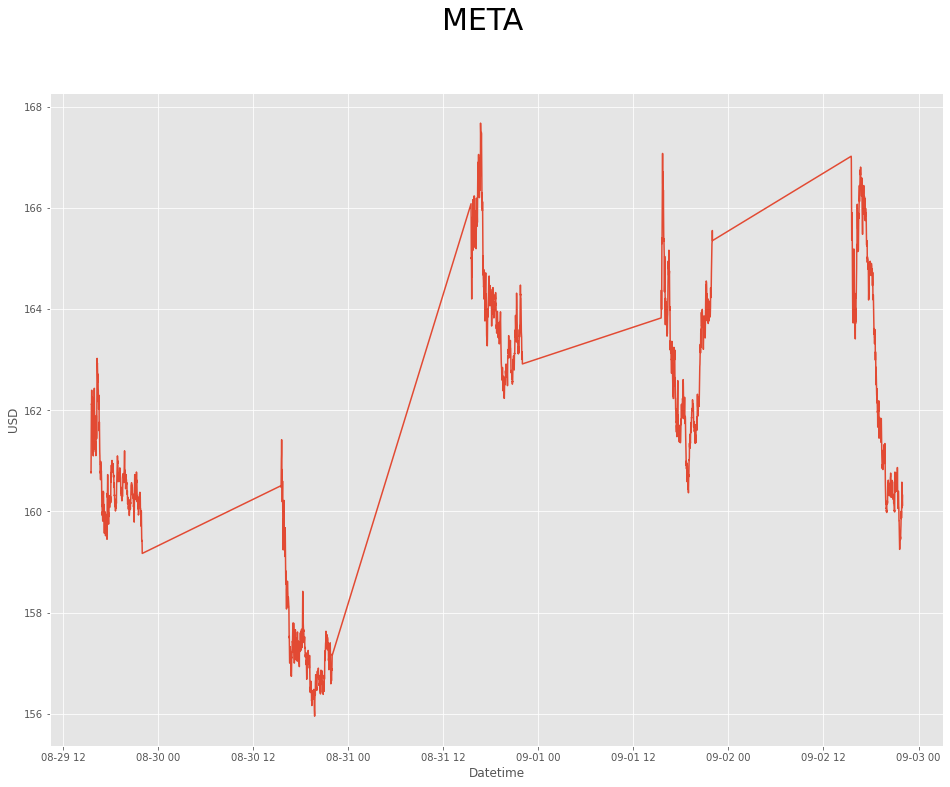

In [9]:
# read in the relevant stock data
palette = sns.color_palette("bright", 6)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,12))
fig.suptitle('META', fontsize=30)
df_stock = pd.read_excel('/Users/Jens/Desktop/Seminar/STOCK_DATA/META.xlsx') # Read excel file
df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
df_stock = df_stock.reset_index(drop=True) # Make a new index:  
df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
df_stock = df_stock.reset_index(drop=True) # Reset the index
df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'
df = pd.DataFrame(df_stock,columns=['Datetime','Last Price'])
sns.lineplot( data=df, x="Datetime", y="Last Price",
        legend="full",palette=palette)
plt.ylabel('USD')
plt.show()        

Datetime      0
Tweet Id      0
Text          0
Username     25
Followers    25
compound      0
dtype: int64
Datetime     0
Tweet Id     0
Text         0
Username     0
Followers    0
compound     0
dtype: int64


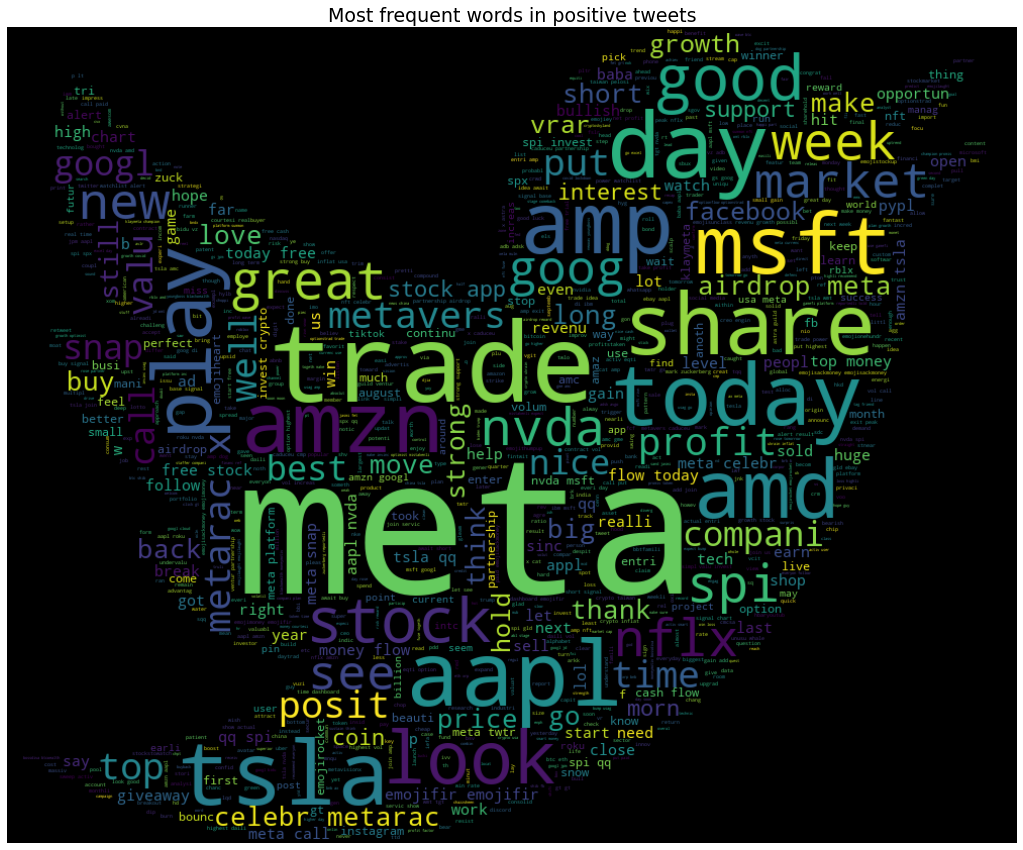

None


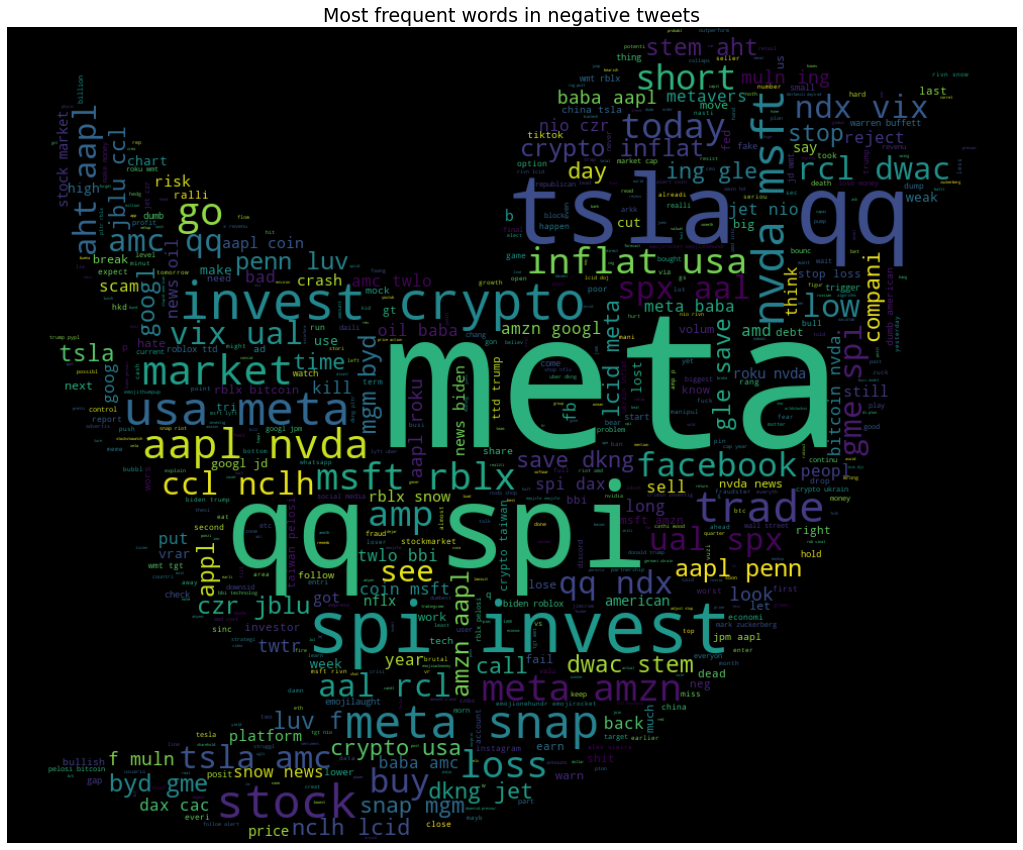

None


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Features: 66705

Test accuracy for LinReg: 64.06%
Test accuracy for LogReg: 62.80%
Best model: LinearSVC
      Return  Followers  Minutes in holdposition  Number of Transactions
0   0.370630        500                        1                      80
1  -0.060359        500                        2                      80
2  -0.511015        500                        3                      80
3  -1.850306        500                        4                      80
4  -2.112358        500                        5                      80
5   0.357823       2500                        1                      52
6   0.704476       2500                        2                      52
7  -0.205203       2500                        3                      52
8  -0.682117       2500                        4                      52
9  -1.336247       2500                        5                      52
10  0.300518       5000                        1                      41
11  1.287525       

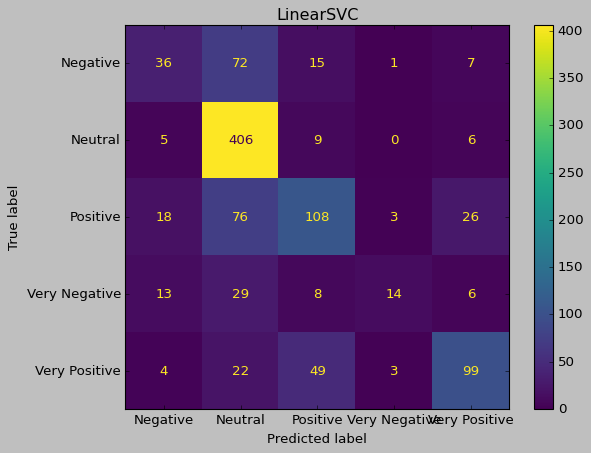

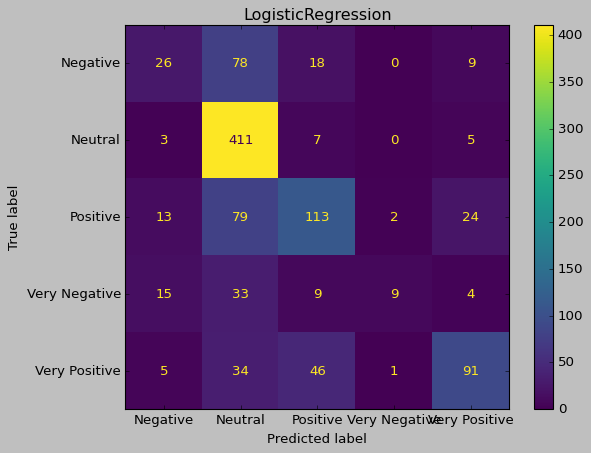

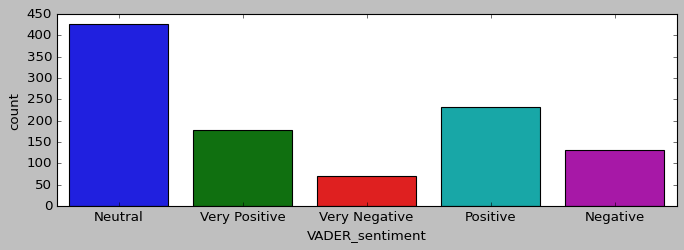

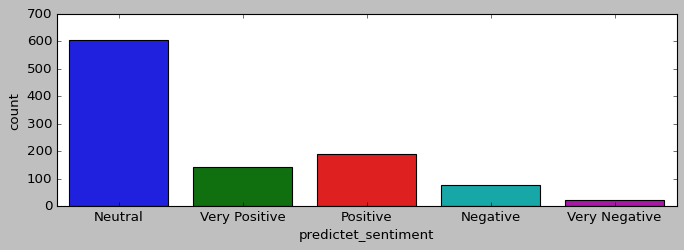

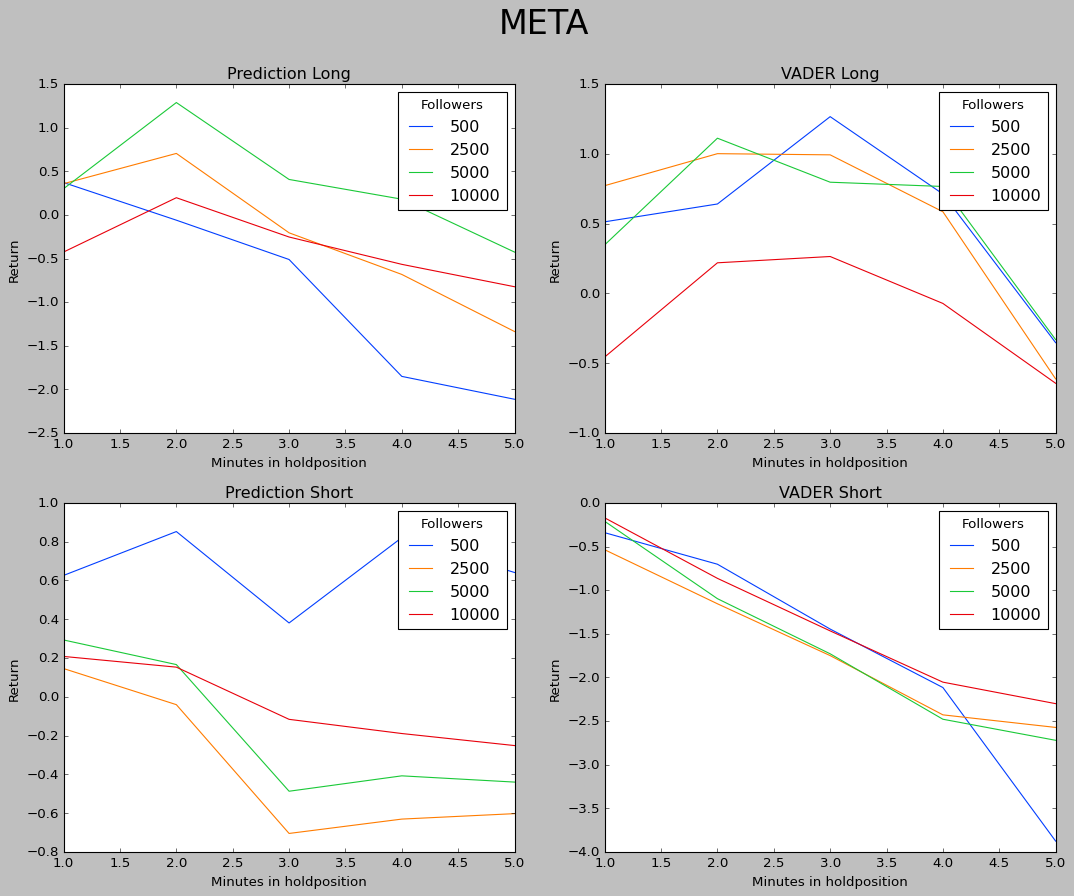

Test accuracy for test_model: 66.21%
     Return  Followers  Minutes in holdposition  Number of Transactions
0  0.320464     5000.0                      2.0                      38
    Return  Followers  Minutes in holdposition  Number of Transactions
0 -1.15924      500.0                      2.0                      14
     Return  Followers  Minutes in holdposition  Number of Transactions
0 -2.140179      500.0                      3.0                     121
     Return  Followers  Minutes in holdposition  Number of Transactions
0  0.385816    10000.0                      1.0                      12
Best pred return for long: 0.32
Best pred return for short: -1.16
Best VADER return for long: -2.14
Best VADER return for short: 0.39
TOTAL for pred: -0.8388
TOTAL for Vader: -1.7544


In [10]:
total_META, best_parameters_META = function('/Users/Jens/Desktop/Seminar/META_open.csv','META','/Users/Jens/Desktop/Seminar/STOCK_DATA/META.xlsx')

### TSLA

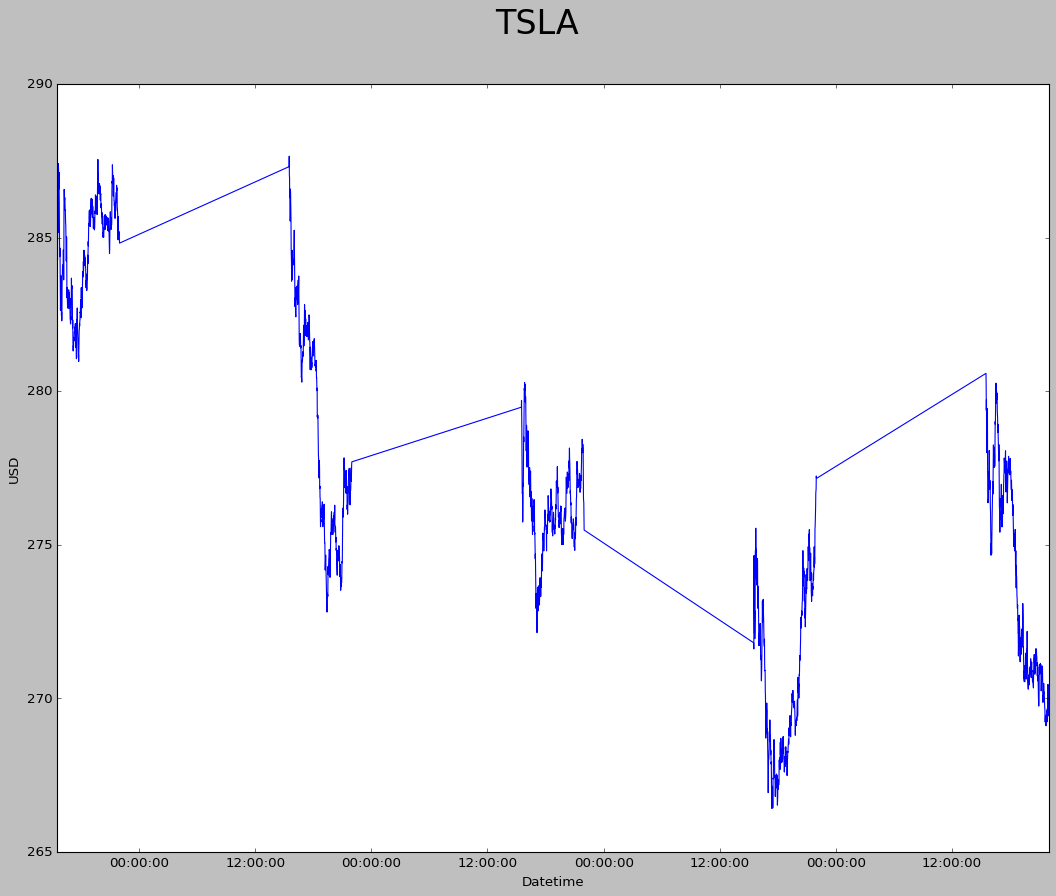

In [11]:
# read in the relevant stock data
palette = sns.color_palette("bright", 6)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,12))
fig.suptitle('TSLA', fontsize=30)
df_stock = pd.read_excel('/Users/Jens/Desktop/Seminar/STOCK_DATA/TSLA.xlsx') # Read excel file
df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
df_stock = df_stock.reset_index(drop=True) # Make a new index:  
df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
df_stock = df_stock.reset_index(drop=True) # Reset the index
df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'
df = pd.DataFrame(df_stock,columns=['Datetime','Last Price'])
sns.lineplot( data=df, x="Datetime", y="Last Price",
        legend="full",palette=palette)
plt.ylabel('USD')
plt.show()      

Datetime      0
Tweet Id      0
Text          0
Username     55
Followers    55
compound      0
dtype: int64
Datetime     0
Tweet Id     0
Text         0
Username     0
Followers    0
compound     0
dtype: int64


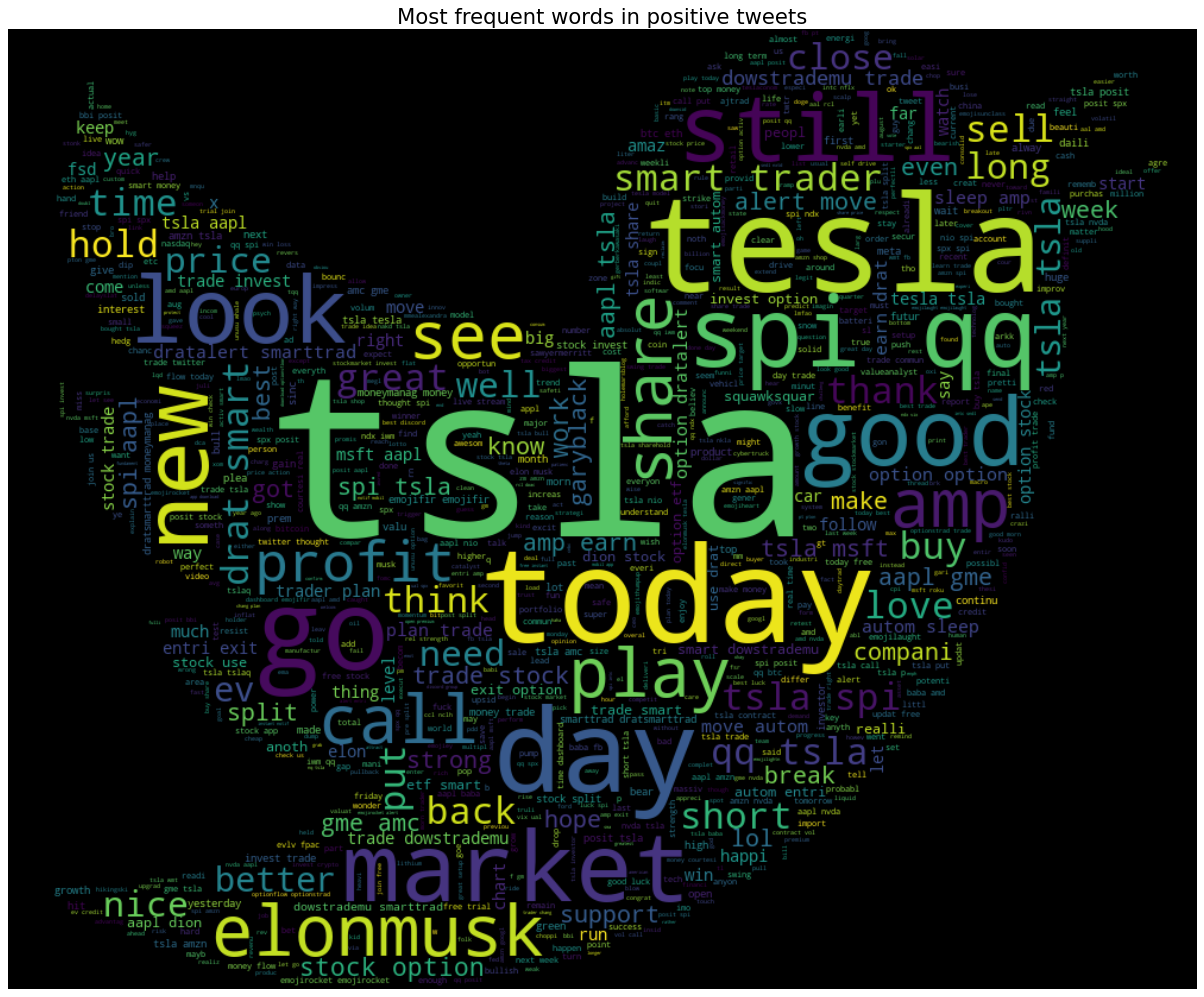

None


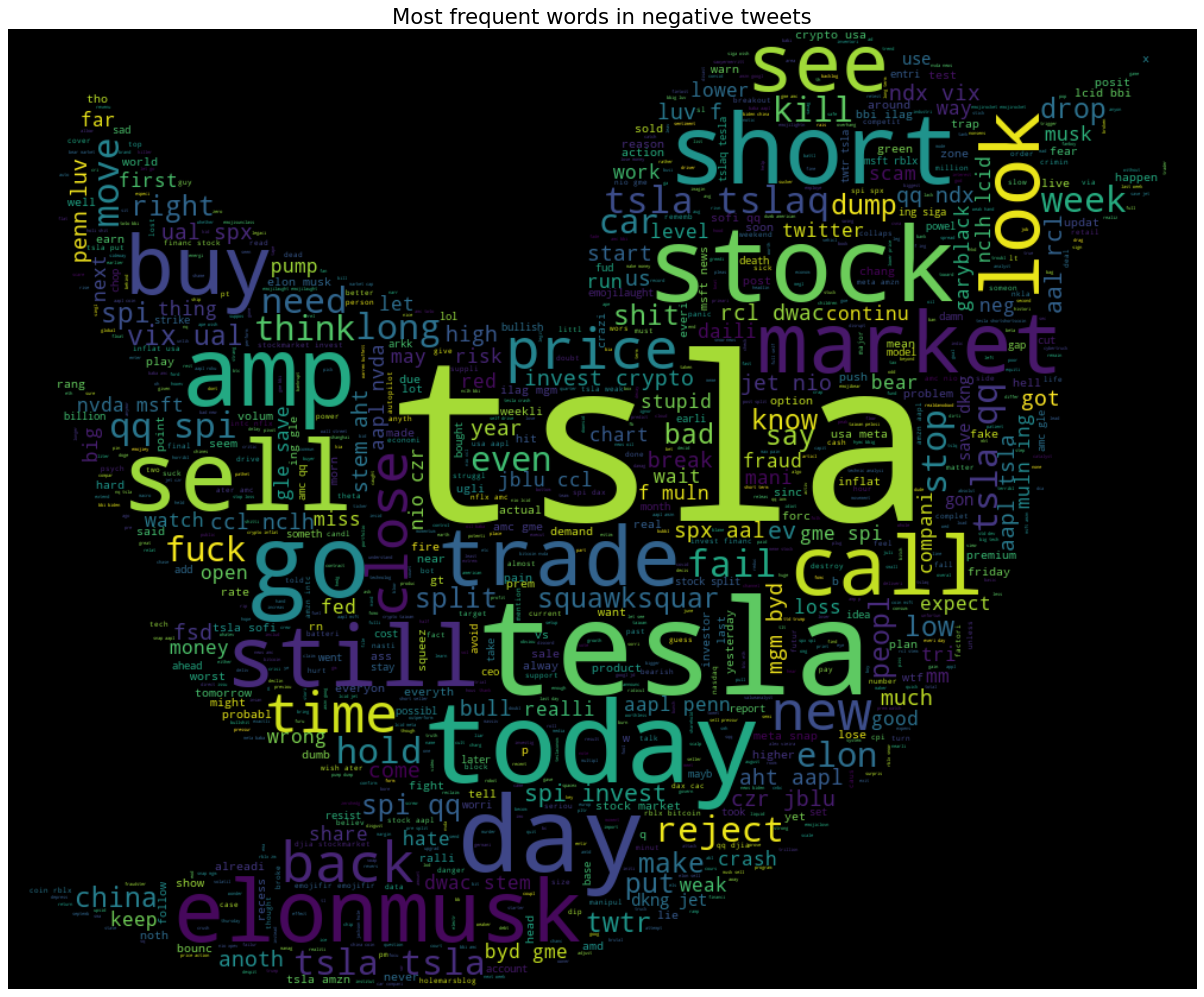

None
Features: 280420

Test accuracy for LinReg: 69.68%
Test accuracy for LogReg: 70.08%
Best model: LogisticRegression
      Return  Followers  Minutes in holdposition  Number of Transactions
0  -5.451916        500                        1                     687
1  -7.367538        500                        2                     687
2  -7.638618        500                        3                     687
3  -9.009603        500                        4                     687
4  -8.587246        500                        5                     687
5  -7.070361       2500                        1                     365
6  -6.137654       2500                        2                     365
7  -4.617354       2500                        3                     365
8  -7.745752       2500                        4                     365
9  -6.965979       2500                        5                     365
10 -5.879632       5000                        1                     272
11 -

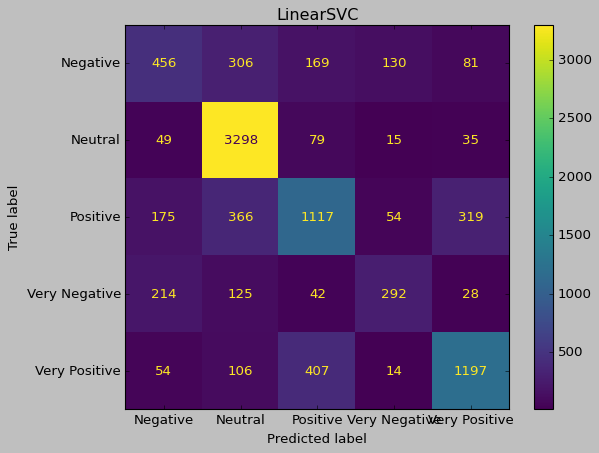

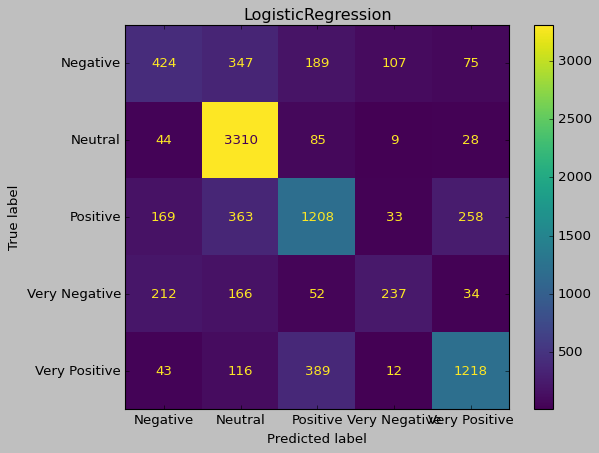

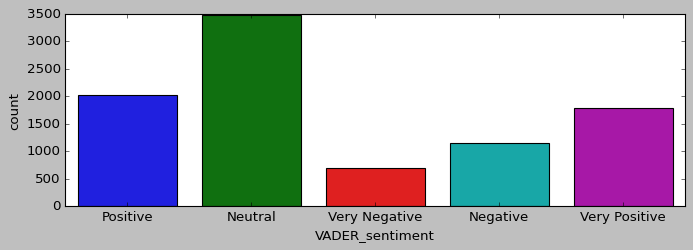

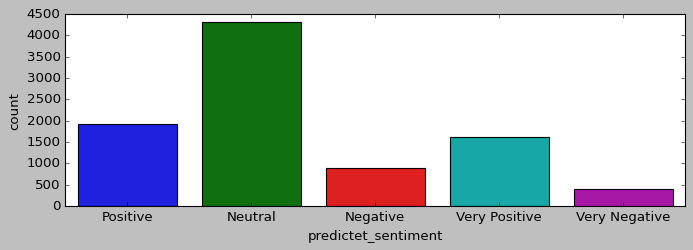

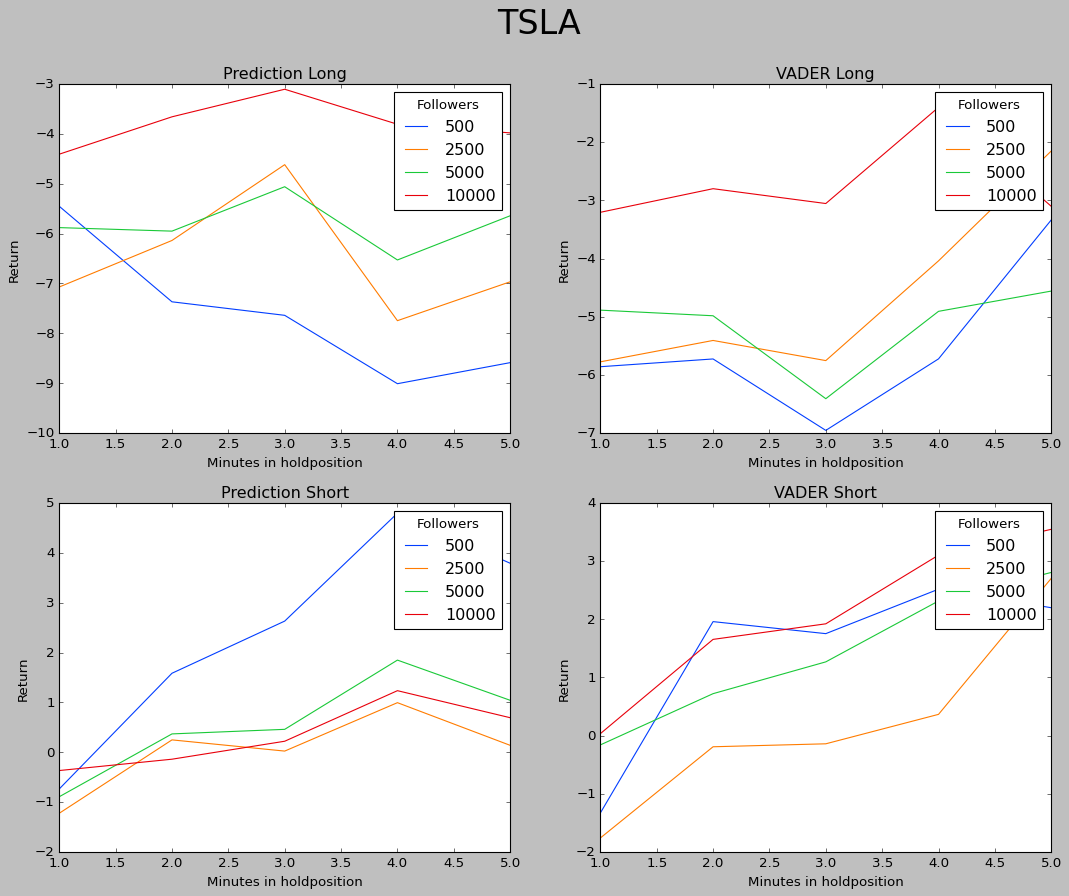

Test accuracy for test_model: 68.53%
     Return  Followers  Minutes in holdposition  Number of Transactions
0 -3.106995    10000.0                      3.0                     106
     Return  Followers  Minutes in holdposition  Number of Transactions
0  6.004925      500.0                      4.0                     171
     Return  Followers  Minutes in holdposition  Number of Transactions
0 -6.947626    10000.0                      4.0                     124
     Return  Followers  Minutes in holdposition  Number of Transactions
0  2.386689    10000.0                      5.0                      43
Best pred return for long: -3.11
Best pred return for short: 6.00
Best VADER return for long: -6.95
Best VADER return for short: 2.39
TOTAL for pred: 2.8979
TOTAL for Vader: -4.5609


In [12]:
total_TSLA, best_parameters_TSLA = function('/Users/Jens/Desktop/Seminar/TSLA_open.csv','TSLA','/Users/Jens/Desktop/Seminar/STOCK_DATA/TSLA.xlsx')

### NIO

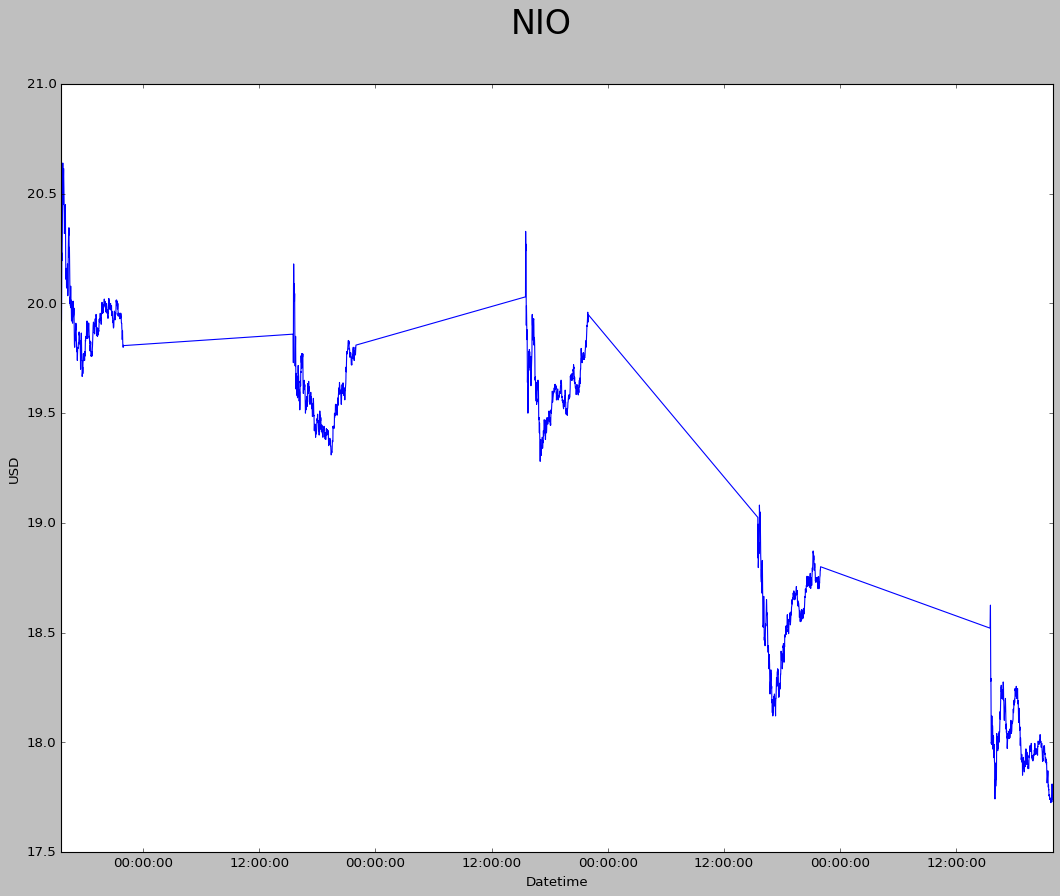

In [13]:
# read in the relevant stock data
palette = sns.color_palette("bright", 6)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,12))
fig.suptitle('NIO', fontsize=30)
df_stock = pd.read_excel('/Users/Jens/Desktop/Seminar/STOCK_DATA/NIO.xlsx') # Read excel file
df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
df_stock = df_stock.reset_index(drop=True) # Make a new index:  
df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
df_stock = df_stock.reset_index(drop=True) # Reset the index
df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'
df = pd.DataFrame(df_stock,columns=['Datetime','Last Price'])
sns.lineplot( data=df, x="Datetime", y="Last Price",
        legend="full",palette=palette)
plt.ylabel('USD')
plt.show()      

Datetime     0
Tweet Id     0
Text         0
Username     8
Followers    8
compound     0
dtype: int64
Datetime     0
Tweet Id     0
Text         0
Username     0
Followers    0
compound     0
dtype: int64


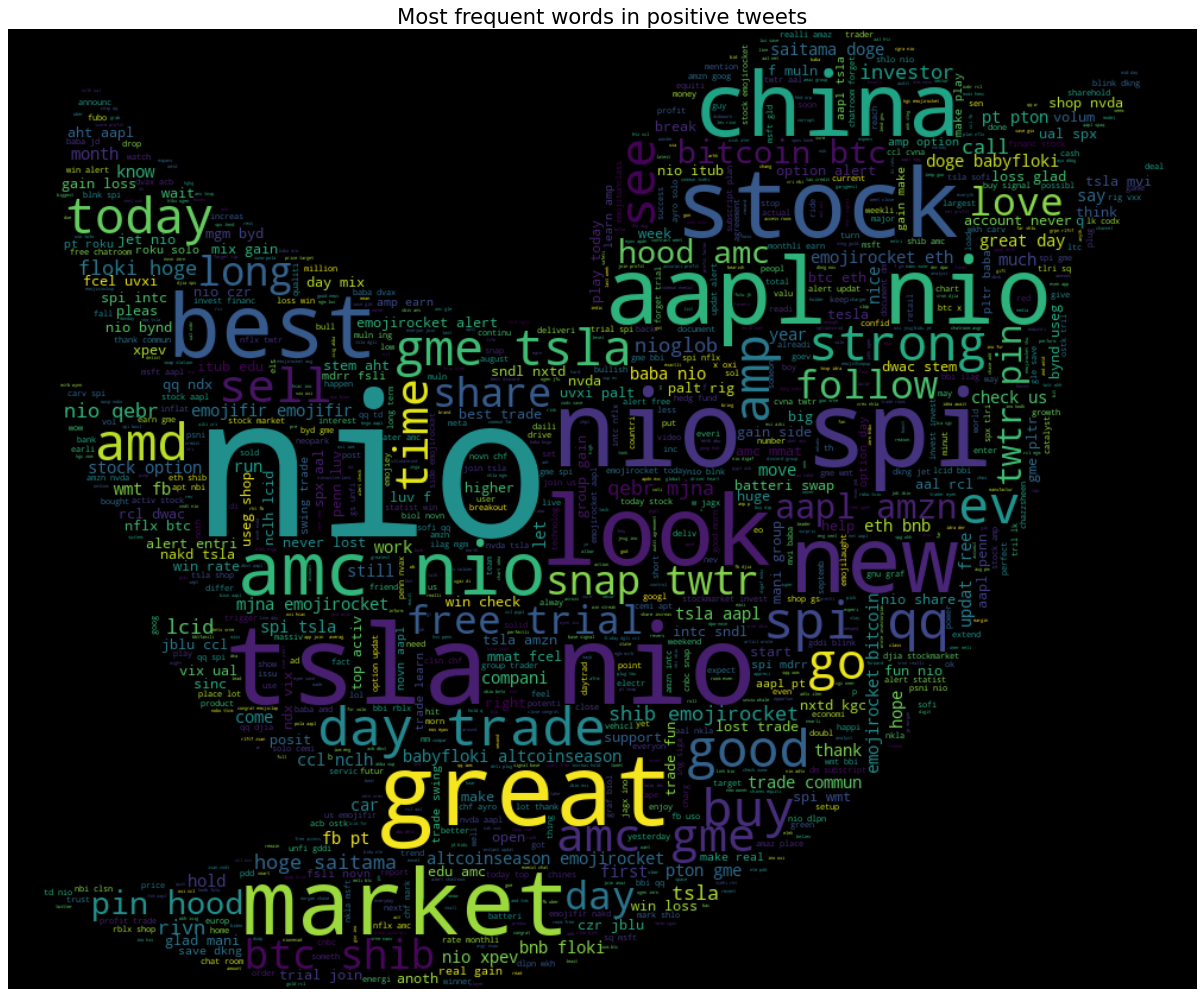

None


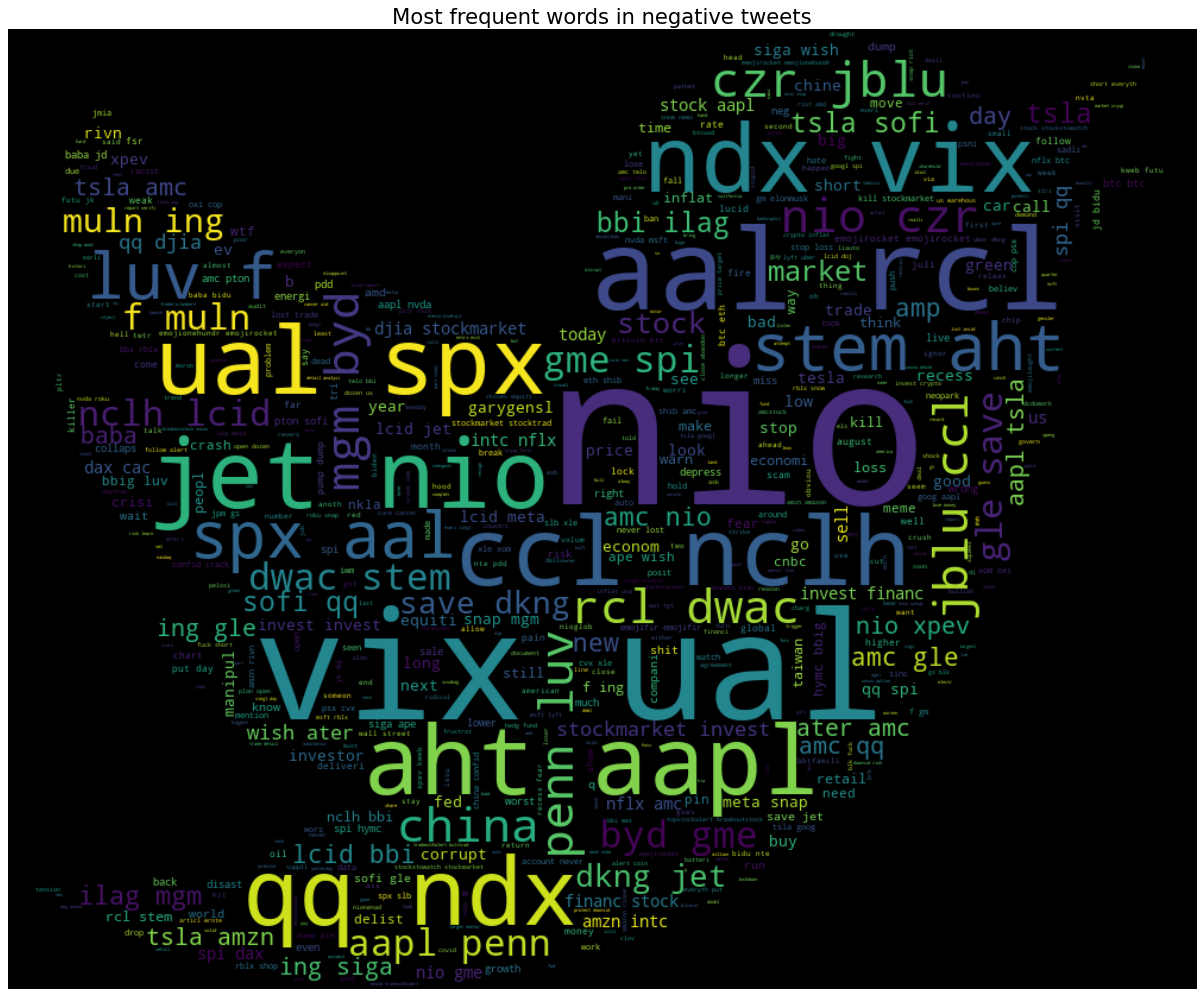

None
Features: 49061

Test accuracy for LinReg: 67.09%
Test accuracy for LogReg: 65.53%
Best model: LinearSVC
      Return  Followers  Minutes in holdposition  Number of Transactions
0   1.781717        500                        1                      75
1   2.556428        500                        2                      75
2   2.763369        500                        3                      75
3   4.223068        500                        4                      75
4   3.453147        500                        5                      75
5   0.708158       2500                        1                      41
6   1.056208       2500                        2                      41
7   0.915498       2500                        3                      41
8   2.333699       2500                        4                      41
9   1.550570       2500                        5                      41
10  0.241838       5000                        1                      25
11  0.171569  

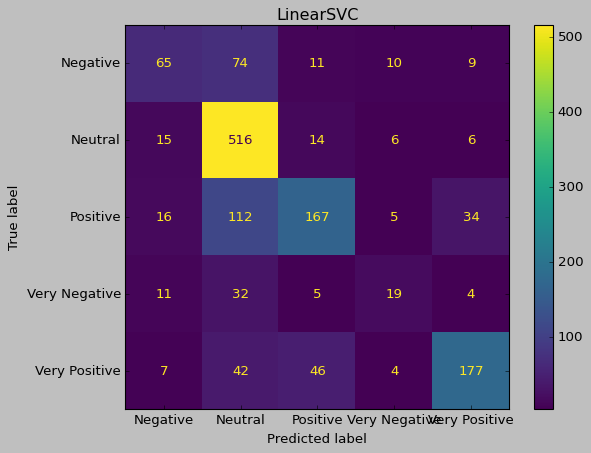

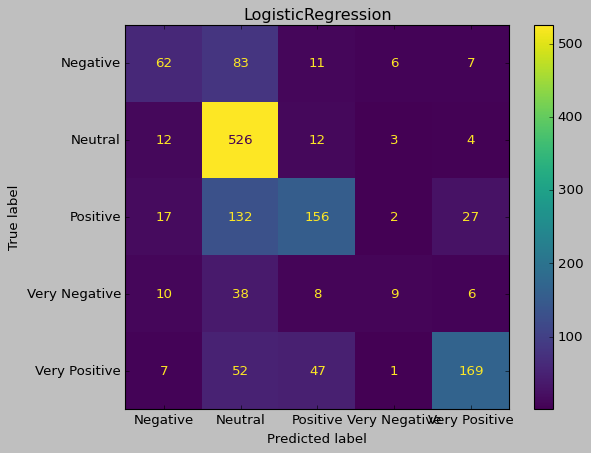

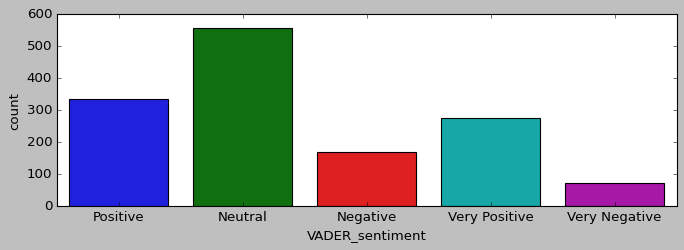

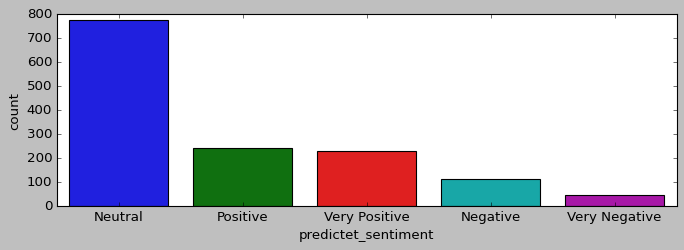

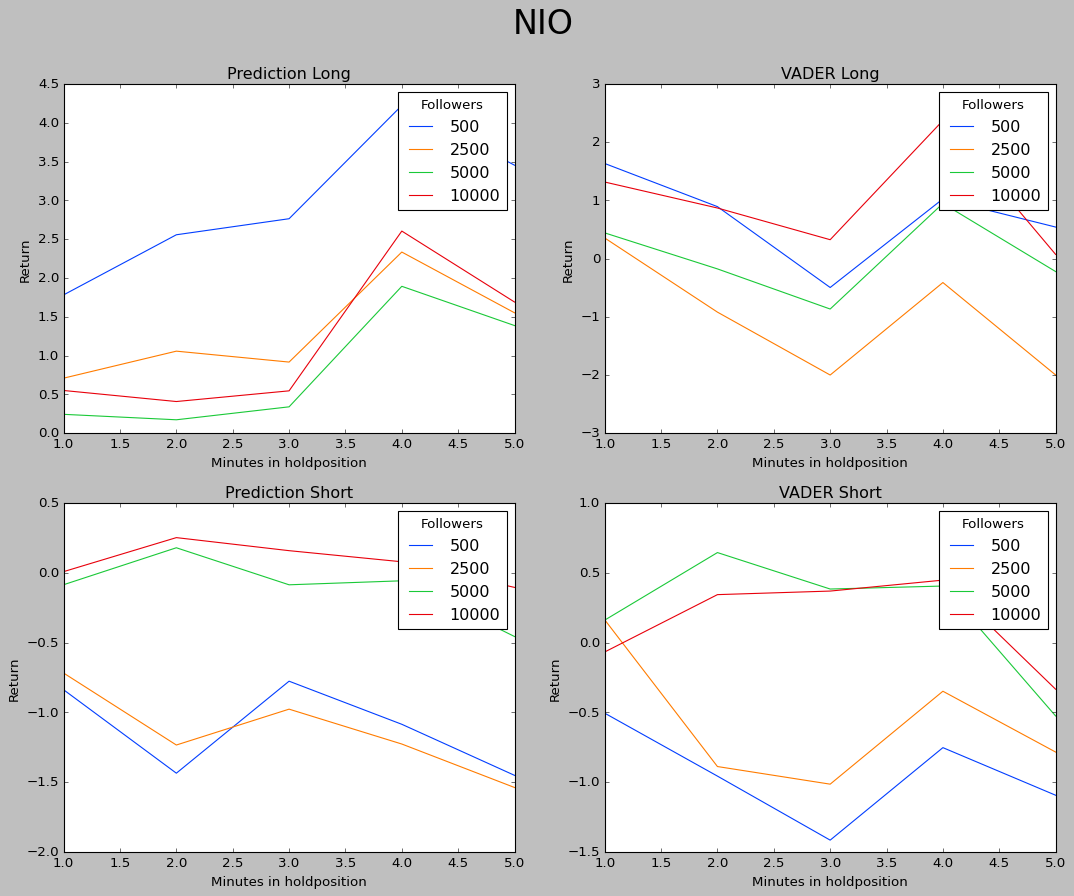

Test accuracy for test_model: 59.70%
     Return  Followers  Minutes in holdposition  Number of Transactions
0 -2.892014      500.0                      4.0                      70
   Return  Followers  Minutes in holdposition  Number of Transactions
0     0.0    10000.0                      2.0                       0
     Return  Followers  Minutes in holdposition  Number of Transactions
0  0.245658    10000.0                      4.0                      18
     Return  Followers  Minutes in holdposition  Number of Transactions
0  1.215162     5000.0                      2.0                      13
Best pred return for long: -2.89
Best pred return for short: 0.00
Best VADER return for long: 0.25
Best VADER return for short: 1.22
TOTAL for pred: -2.8920
TOTAL for Vader: 1.4608


In [14]:
total_NIO, best_parameters_NIO = function('/Users/Jens/Desktop/Seminar/NIO_open.csv','NIO','/Users/Jens/Desktop/Seminar/STOCK_DATA/NIO.xlsx')

### AMZN

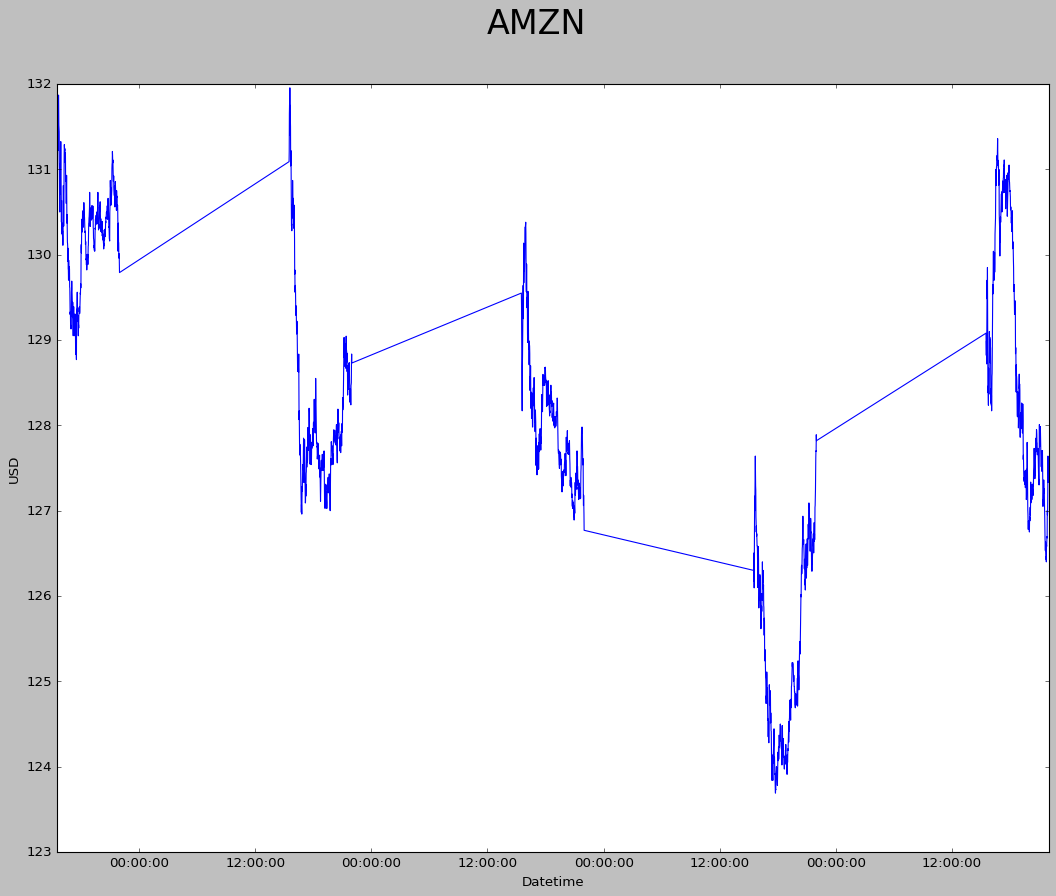

In [15]:
# read in the relevant stock data
palette = sns.color_palette("bright", 6)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,12))
fig.suptitle('AMZN', fontsize=30)
df_stock = pd.read_excel('/Users/Jens/Desktop/Seminar/STOCK_DATA/AMZN.xlsx') # Read excel file
df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
df_stock = df_stock.reset_index(drop=True) # Make a new index:  
df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
df_stock = df_stock.reset_index(drop=True) # Reset the index
df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime'
df = pd.DataFrame(df_stock,columns=['Datetime','Last Price'])
sns.lineplot( data=df, x="Datetime", y="Last Price",
        legend="full",palette=palette)
plt.ylabel('USD')
plt.show()      

Datetime      0
Tweet Id      8
Text          8
Username     23
Followers    23
compound      0
dtype: int64
Datetime     0
Tweet Id     0
Text         0
Username     0
Followers    0
compound     0
dtype: int64


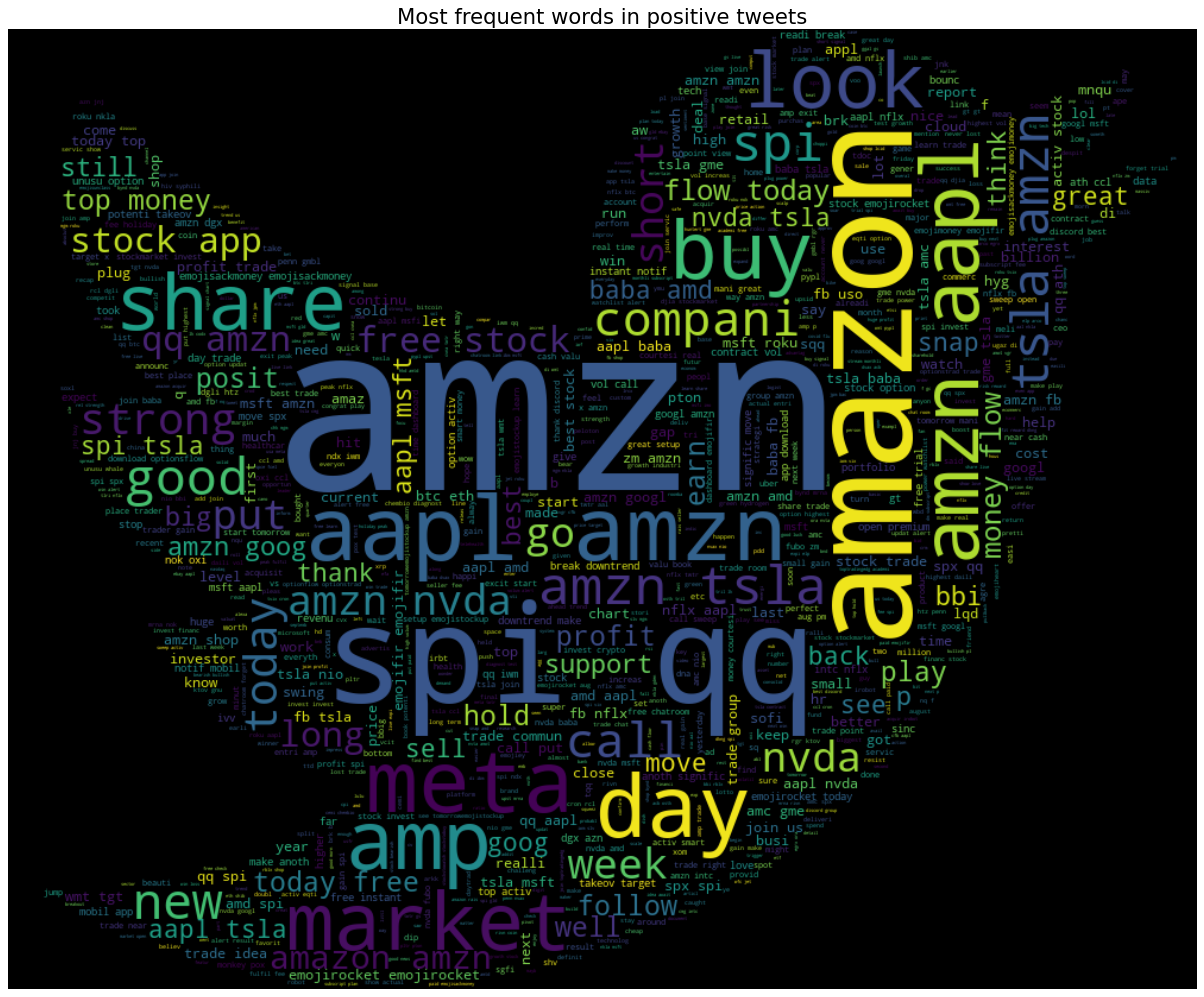

None


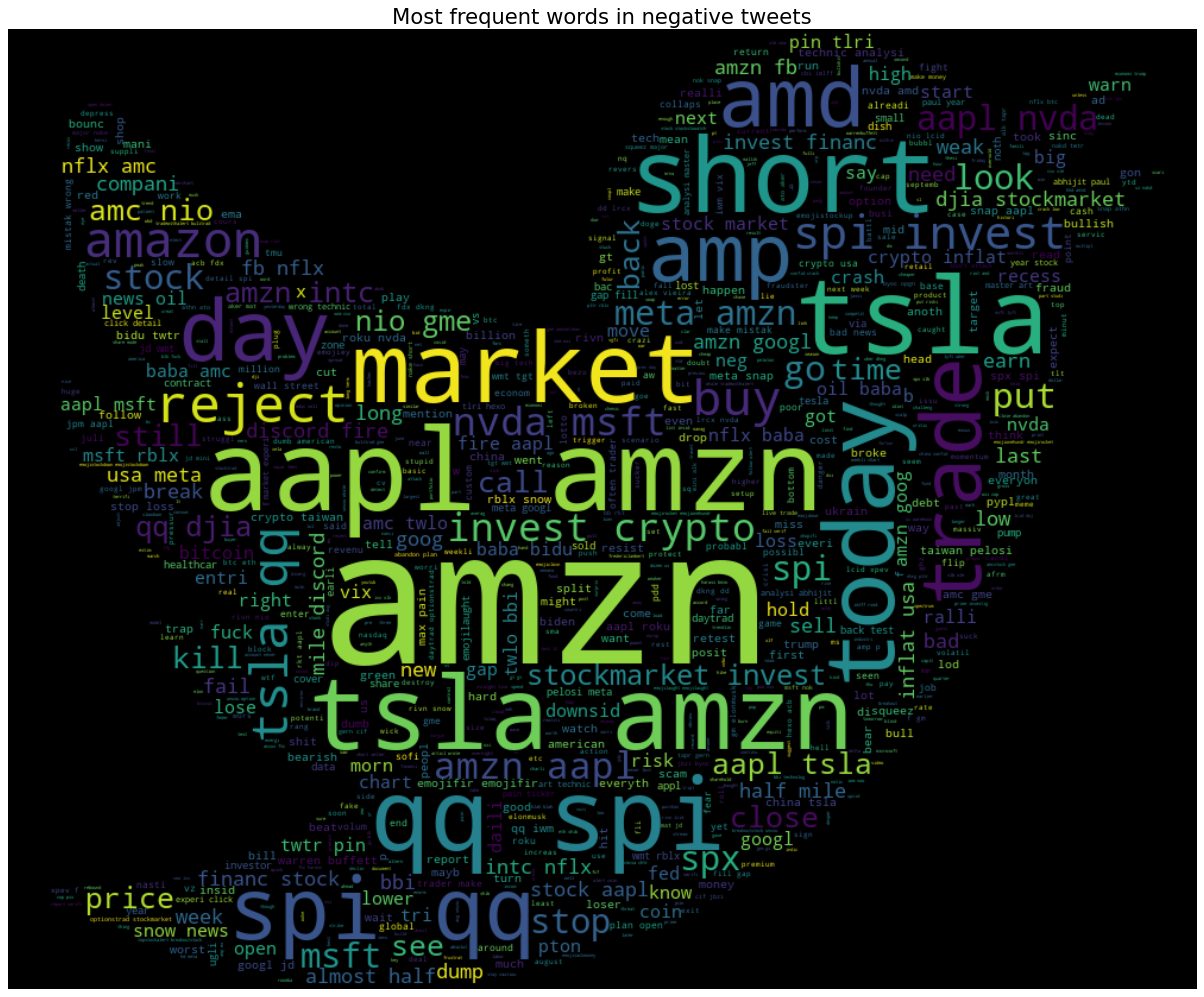

None
Features: 98452

Test accuracy for LinReg: 67.53%
Test accuracy for LogReg: 67.09%
Best model: LinearSVC
      Return  Followers  Minutes in holdposition  Number of Transactions
0  -0.110983        500                        1                     198
1   1.066052        500                        2                     198
2   1.671226        500                        3                     198
3   1.136694        500                        4                     198
4   0.721860        500                        5                     198
5   0.493840       2500                        1                     124
6   1.518856       2500                        2                     124
7   2.720675       2500                        3                     124
8   2.196837       2500                        4                     124
9   0.840189       2500                        5                     124
10  0.869597       5000                        1                      96
11  2.304416  

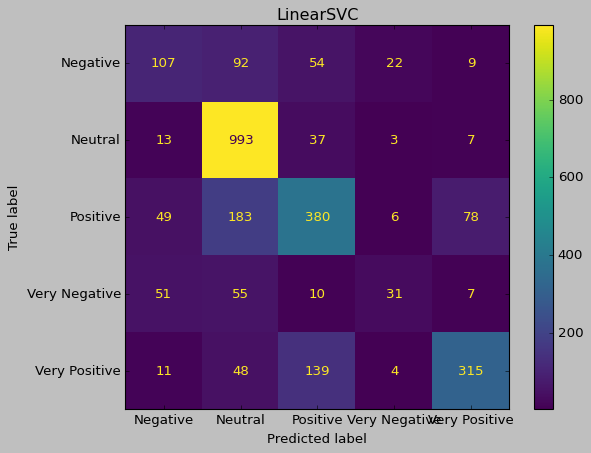

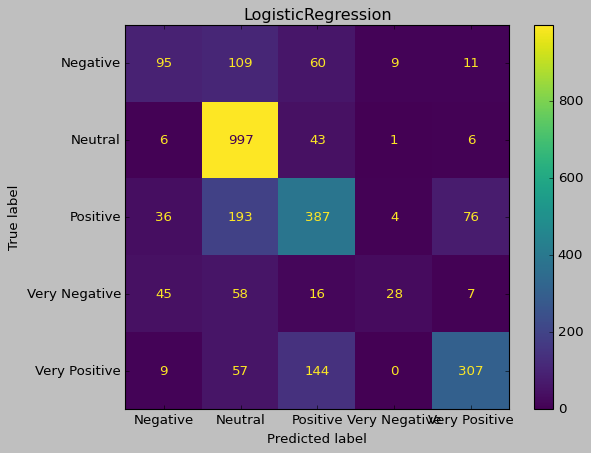

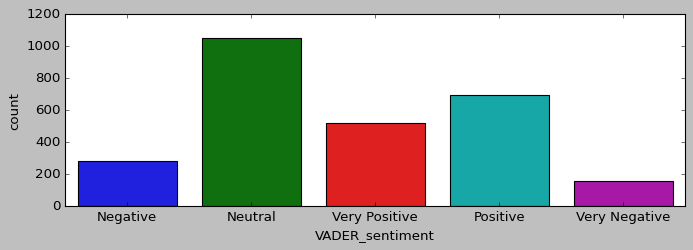

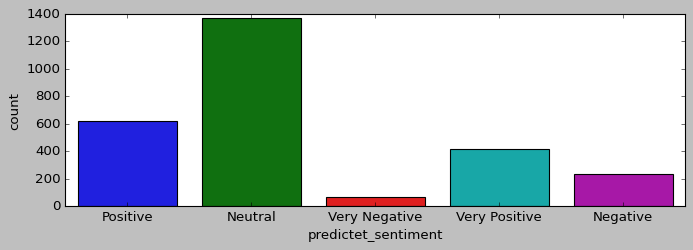

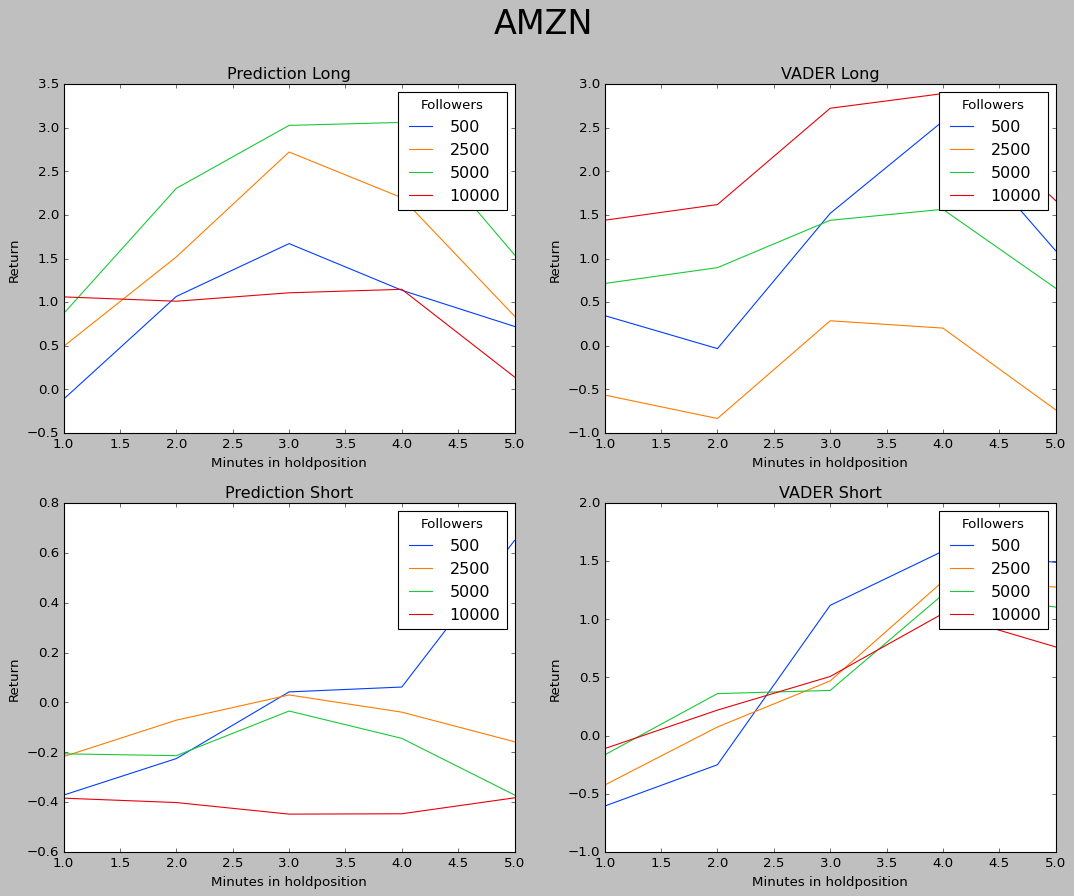

Test accuracy for test_model: 68.16%
     Return  Followers  Minutes in holdposition  Number of Transactions
0  0.973311     5000.0                      4.0                      61
     Return  Followers  Minutes in holdposition  Number of Transactions
0  1.467643      500.0                      5.0                      27
     Return  Followers  Minutes in holdposition  Number of Transactions
0  0.836581    10000.0                      4.0                      40
     Return  Followers  Minutes in holdposition  Number of Transactions
0  3.047278      500.0                      4.0                      58
Best pred return for long: 0.97
Best pred return for short: 1.47
Best VADER return for long: 0.84
Best VADER return for short: 3.05
TOTAL for pred: 2.4410
TOTAL for Vader: 3.8839


In [16]:
total_AMZN, best_parameters_AMZN = function('/Users/Jens/Desktop/Seminar/AMZN_open.csv','AMZN','/Users/Jens/Desktop/Seminar/STOCK_DATA/AMZN.xlsx')

# Simulation

## For LONG

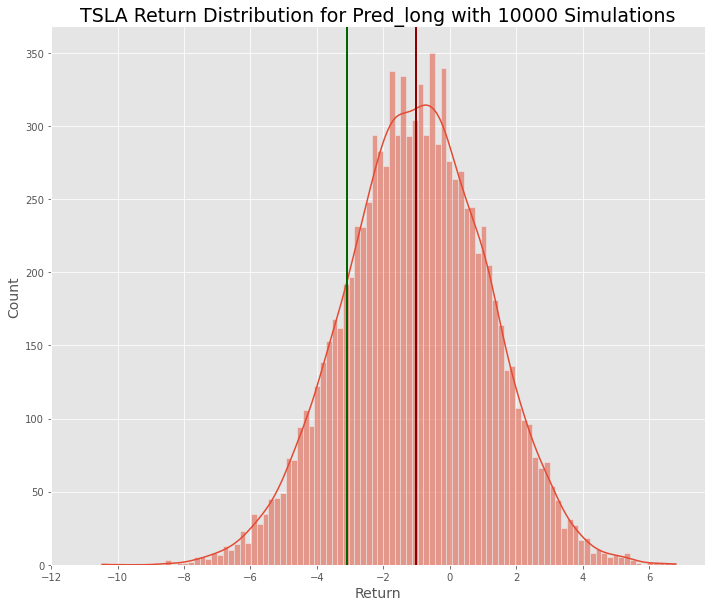

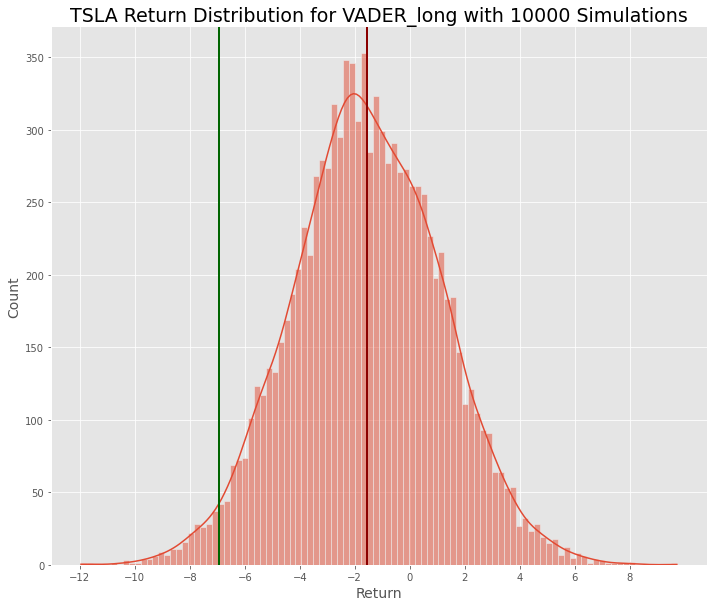

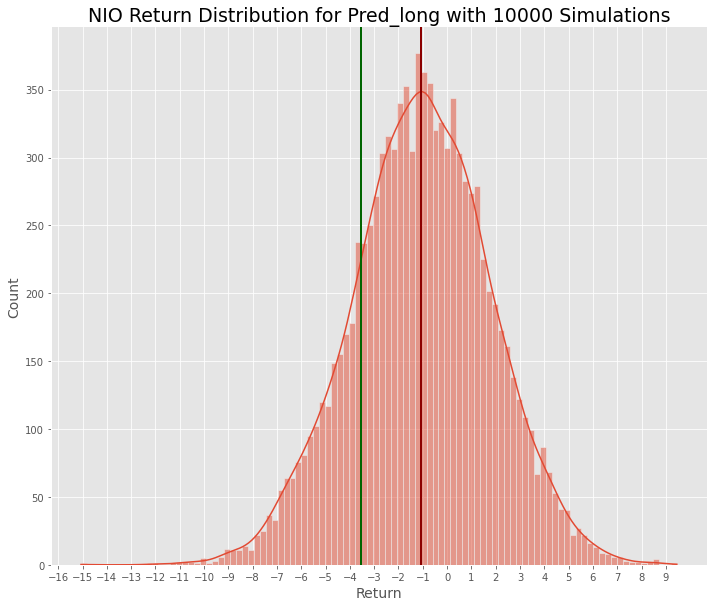

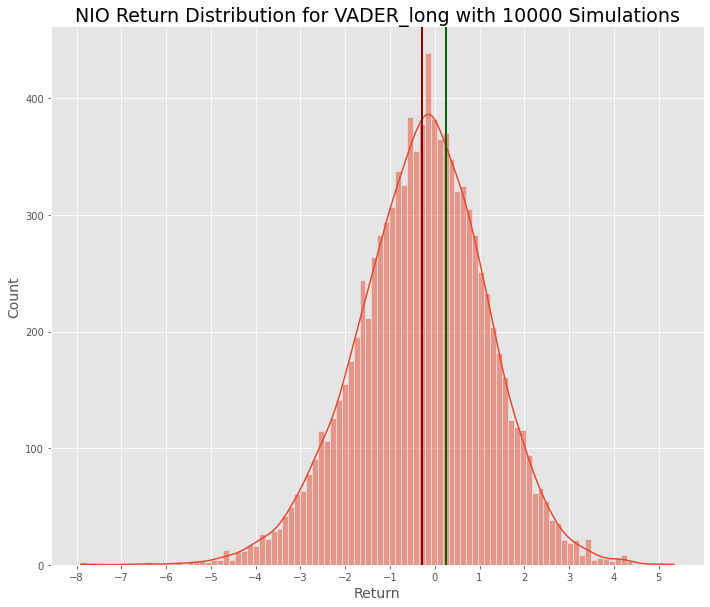

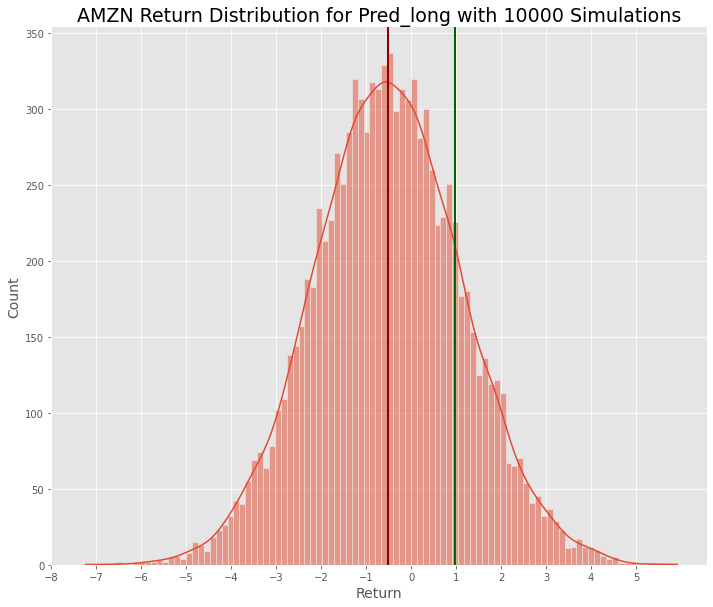

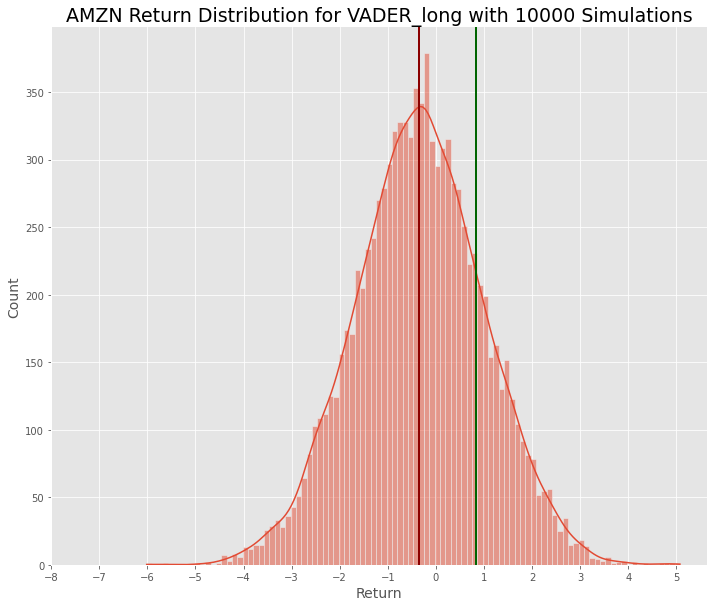

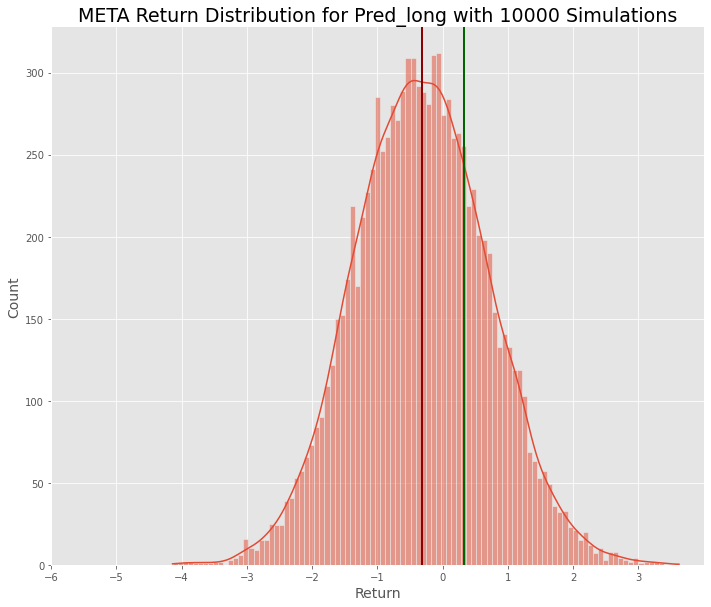

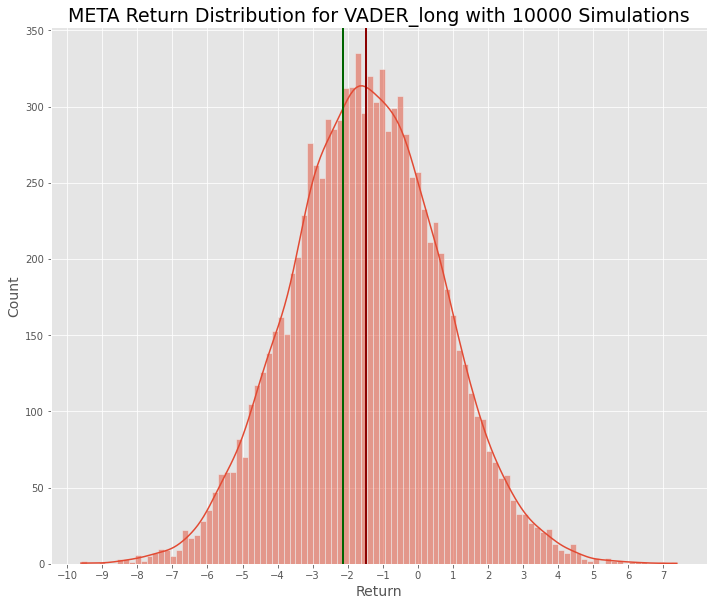

In [6]:
# list = [(number of iterations,number of trades, holdposition, return, modelname,x-asis numbers)]
listen_final = [(10000,105,3,-3.106995,'Pred_long',2,'TSLA'),(10000,123,4,-6.947626,'VADER_long',2,'TSLA'),
                (10000,69,4,-3.539612,'Pred_long',1,'NIO'),(10000,18,4,0.245658,'VADER_long',1,'NIO'),
                (10000,61,4,0.973311,'Pred_long',1,'AMZN'),(10000,40,4,0.836581,'VADER_long',1,'AMZN'),
                (10000,38,2,0.320464,'Pred_long',1,'META'),(10000,121,3,-2.140179,'VADER_long',1,'META')]

for c,v,b,n,m,l,w in listen_final:
    df_stock = pd.read_excel(f'/Users/Jens/Desktop/Seminar/STOCK_DATA/{w}.xlsx') # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime

    # Merge the two dataframes
    combined = df_stock

    mylist = combined["Datetime"].tolist()
    monday = mylist[0:385]
    tuesday = mylist[390:385+390]
    wednesday = mylist[390*2:(390*2)+385]
    thursday = mylist[390*3:(390*3)+385]
    friday = mylist[390*4:(390*4)+385]

    weekdays = []

    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)
    #number of times we wish to run strategy:
    e = range(c)
    # Make the list of list only to a list: 
    ny_weekdays = [val for sublist in weekdays for val in sublist]

     # number of experiments
    listen = [] # make a list to store all the lists
    for i in e: 
        number = random.sample(set(ny_weekdays), (v+1)) # last number is the 
        listen.append(number)

    hold_position = [b] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    sum_results=[] #container for main result
    transactions_result =[] #container for check numbers of transactions

    for e in range(c):
        buy_time = listen[e]
        store=[]
        for y in hold_position:
            for i in range(len(buy_time)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((sell_stock - buy_stock)/(buy_stock)*100)
                store.append(difference)
        sum = np.sum(store)
        number_of_trans = len(store)
        sum_results.append(sum)
        transactions_result.append(number_of_trans)


    sns.displot(sum_results,kde=True,
                bins=100,height=8,aspect=1.25)
    plt.xlabel("Return", size=14)
    plt.ylabel("Count", size=14)
    plt.xticks(np.arange((math.floor(min(sum_results) / 2.) * 2), (math.ceil(max(sum_results) / 2.) * 2), l))
    plt.axvline(x=mean(sum_results),
                color='darkred',linewidth=2)         
    plt.axvline(n,
                color='darkgreen',linewidth=2)
    plt.savefig(f'Seaborn_{w}_{m}.png')
    plt.title(f'{w} Return Distribution for {m} with {c} Simulations', fontsize=19)
    plt.plot

## For SHORT

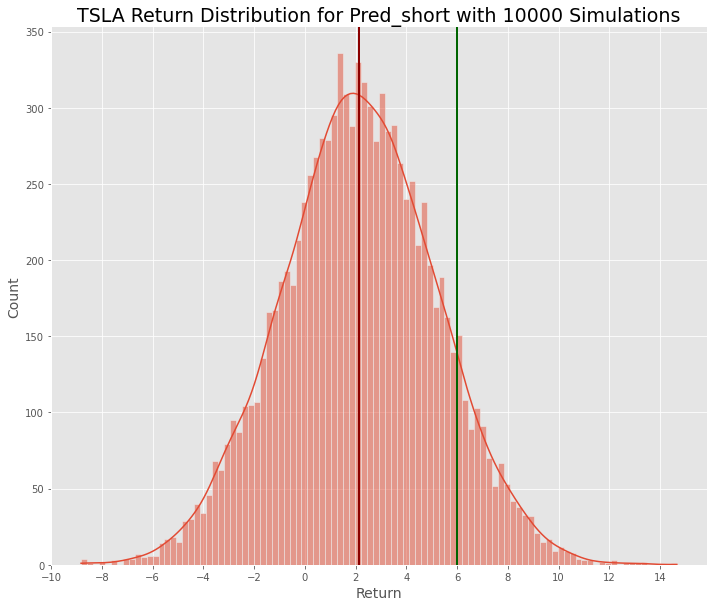

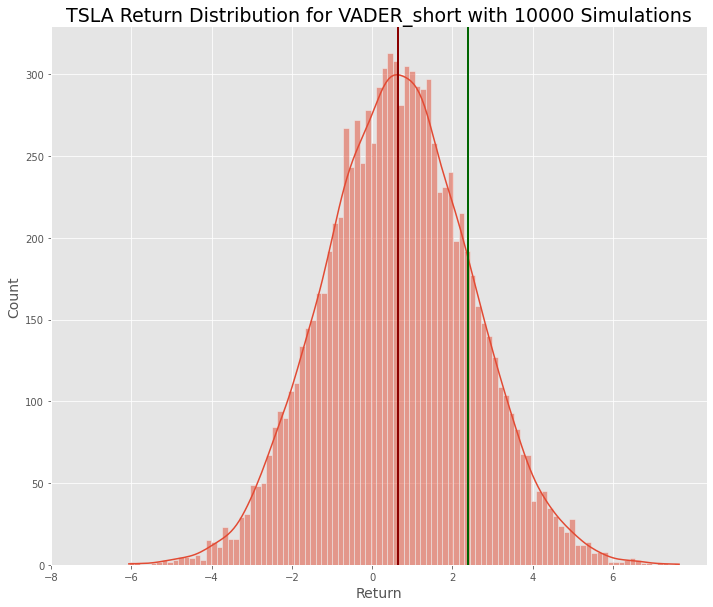

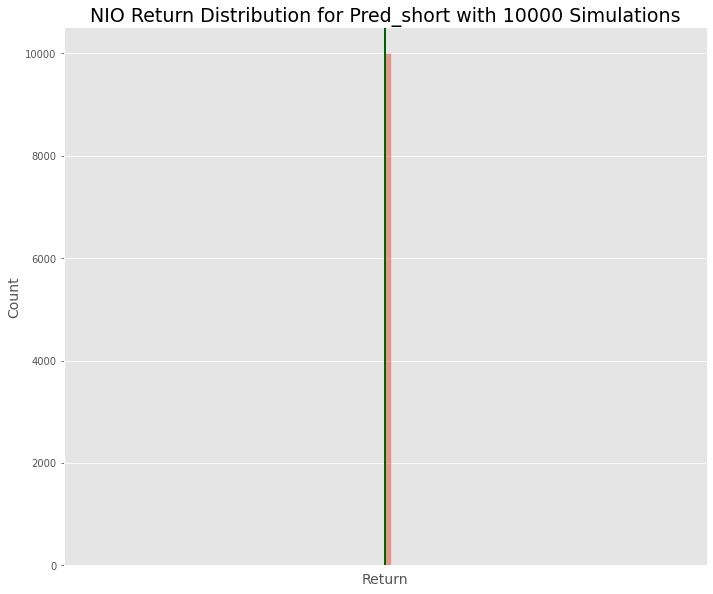

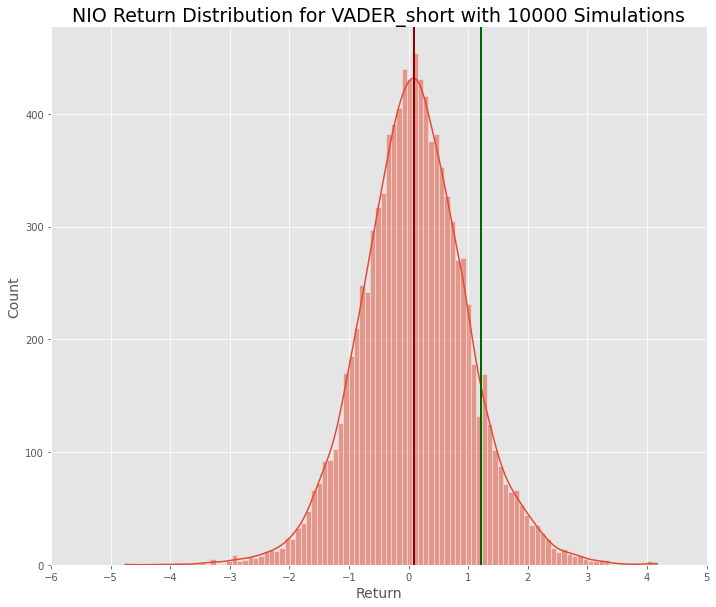

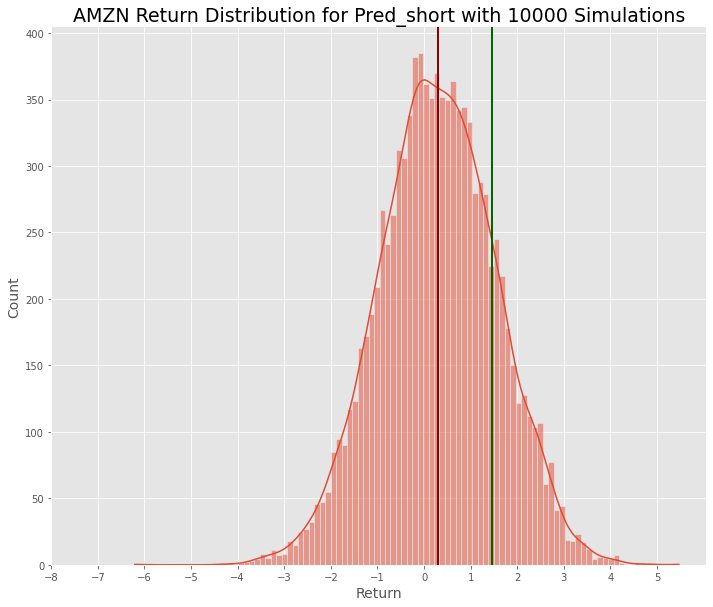

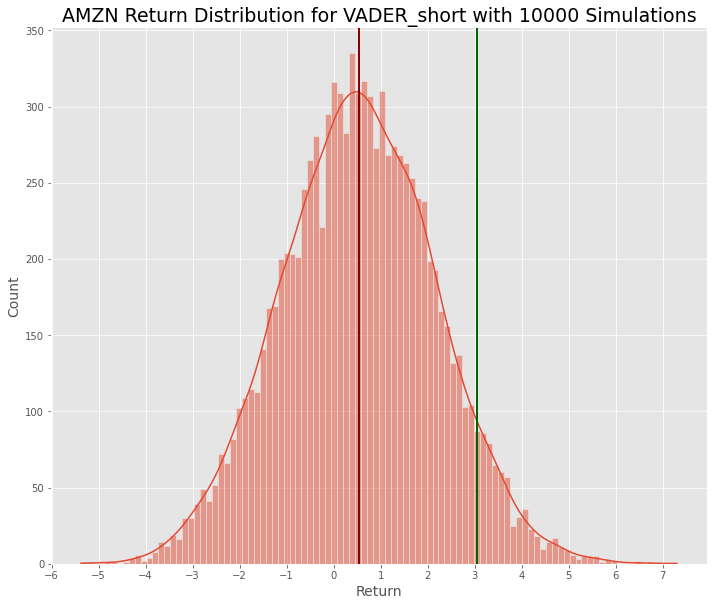

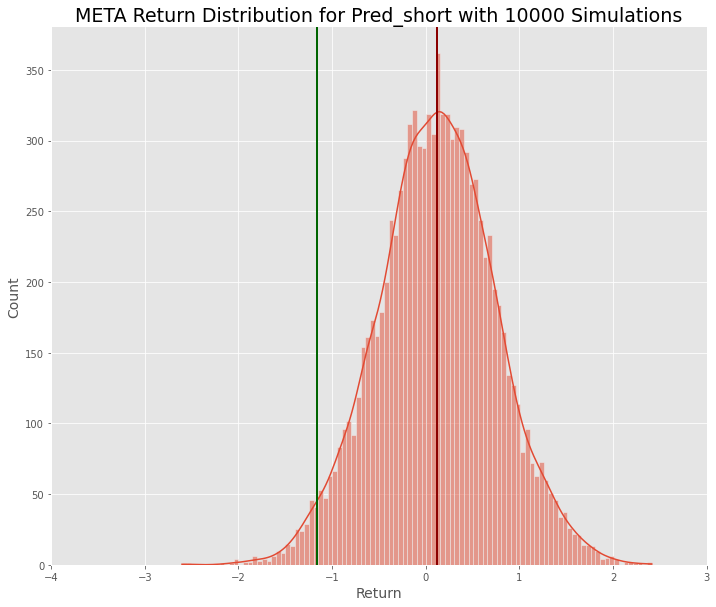

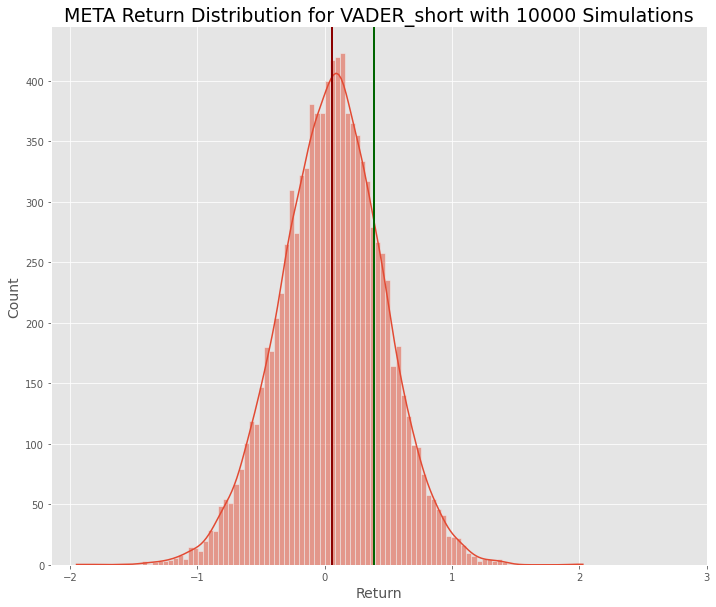

In [7]:
# list = [(number of iterations,number of trades, holdposition, return, modelname,x-asis numbers)]
listen_final = [(10000,166,4,6.004925,'Pred_short',2,'TSLA'),(10000,43,5,2.386689,'VADER_short',2,'TSLA'),
                (10000,0,2,0,'Pred_short',1,'NIO'),(10000,13,2,1.215162,'VADER_short',1,'NIO'),
                (10000,27,5,1.467643,'Pred_short',1,'AMZN'),(10000,58,4,3.047278,'VADER_short',1,'AMZN'),
                (10000,14,2,-1.15924,'Pred_short',1,'META'),(10000,12,1,0.385816,'VADER_short',1,'META')]

for c,v,b,n,m,l,w in listen_final:
    df_stock = pd.read_excel(f'/Users/Jens/Desktop/Seminar/STOCK_DATA/{w}.xlsx') # Read excel file
    df_stock = df_stock.sort_values(by=['Date']) # Sort the datetime from the beginning to the end
    df_stock = df_stock.reset_index(drop=True) # Make a new index:  
    df_stock = df_stock[df_stock['Date'].between('2022-08-29 15:30:00', '2022-09-02 22:00:00')] #Extract only the date of interest
    df_stock = df_stock.reset_index(drop=True) # Reset the index
    df_stock = df_stock.rename(columns={'Date': 'Datetime'}) # change the column name to 'Datetime

    # Merge the two dataframes
    combined = df_stock

    mylist = combined["Datetime"].tolist()
    monday = mylist[0:385]
    tuesday = mylist[390:385+390]
    wednesday = mylist[390*2:(390*2)+385]
    thursday = mylist[390*3:(390*3)+385]
    friday = mylist[390*4:(390*4)+385]

    weekdays = []

    # Create List of lists
    weekdays.append(monday)
    weekdays.append(tuesday)
    weekdays.append(wednesday)
    weekdays.append(thursday)
    weekdays.append(friday)
    #number of times we wish to run strategy:
    e = range(c)
    # Make the list of list only to a list: 
    ny_weekdays = [val for sublist in weekdays for val in sublist]

     # number of experiments
    listen = [] # make a list to store all the lists
    for i in e: 
        number = random.sample(set(ny_weekdays), (v+1)) # last number is the 
        listen.append(number)

    hold_position = [b] # number of minutes we hold on to the position (meaning we sell after one minute if hold_position is 1)
    best_strategy = []
    followers_count = []
    hold_position_count = []
    number_of_transactions =[]

    sum_results=[] #container for main result
    transactions_result =[] #container for check numbers of transactions

    for e in range(c):
        buy_time = listen[e]
        store=[]
        for y in hold_position:
            for i in range(len(buy_time)-1):
                buy_stock = combined[combined['Datetime']==buy_time[i]]['Last Price'].reset_index(drop=True)[0] # just for 
                sell_stock = combined[combined['Datetime']==(buy_time[i] + timedelta(minutes=y))]['Last Price'].reset_index(drop=True)[0] 
                difference = ((buy_stock - sell_stock)/(sell_stock))*100
                store.append(difference)
        sum = np.sum(store)
        number_of_trans = len(store)
        sum_results.append(sum)
        transactions_result.append(number_of_trans)


    sns.displot(sum_results,kde=True,
                bins=100,height=8,aspect=1.25)
    plt.xlabel("Return", size=14)
    plt.ylabel("Count", size=14)
    plt.xticks(np.arange((math.floor(min(sum_results) / 2.) * 2), (math.ceil(max(sum_results) / 2.) * 2), l))
    plt.axvline(x=mean(sum_results),
                color='darkred',linewidth=2)         
    plt.axvline(n,
                color='darkgreen',linewidth=2)
    plt.savefig(f'Seaborn_{w}_{m}.png')
    plt.title(f'{w} Return Distribution for {m} with {c} Simulations', fontsize=19)
    plt.plot